FINAL PROJECT DAPR
Joanikij
Mussel
Hans
Filippo

 # Load all Necessary Libraries and Dependencies  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_curve,
    auc,
    classification_report
)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Data Processing and Exploratory Analysis

### Loading and Exploring Raw Data

In [2]:
# Define the file path
file_path = r"C:\Users\nikip\Desktop\try\ObesityDataSet_raw.csv"

# Load the dataset with semicolon separator
df = pd.read_csv(file_path)

# Display the first few rows to verify
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [3]:
# Dataset Shape
print(f"Dataset Shape: {df.shape}\n")

# Column Names
print("Column Names:")
for col in df.columns:
    print(f"- {col}")
print("\n")

# Data Types
print("Data Types:")
print(df.dtypes.to_string(), "\n")


Dataset Shape: (2111, 17)

Column Names:
- Gender
- Age
- Height
- Weight
- family_history_with_overweight
- FAVC
- FCVC
- NCP
- CAEC
- SMOKE
- CH2O
- SCC
- FAF
- TUE
- CALC
- MTRANS
- NObeyesdad


Data Types:
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object 



In [4]:
# Missing Values
print("Missing Values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / df.shape[0]) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})
# Add an indicator
missing_df['Indicator'] = missing_df['Missing Values'].apply(lambda x: '⚠️ Missing' if x > 0 else 'No Values Missing ✅')

print(missing_df.to_string(), "\n")

Missing Values:
                                Missing Values  Missing Percentage (%)            Indicator
Gender                                       0                     0.0  No Values Missing ✅
Age                                          0                     0.0  No Values Missing ✅
Height                                       0                     0.0  No Values Missing ✅
Weight                                       0                     0.0  No Values Missing ✅
family_history_with_overweight               0                     0.0  No Values Missing ✅
FAVC                                         0                     0.0  No Values Missing ✅
FCVC                                         0                     0.0  No Values Missing ✅
NCP                                          0                     0.0  No Values Missing ✅
CAEC                                         0                     0.0  No Values Missing ✅
SMOKE                                        0                  

Summary Statistics:


Target column 'Target' not found in the dataset.


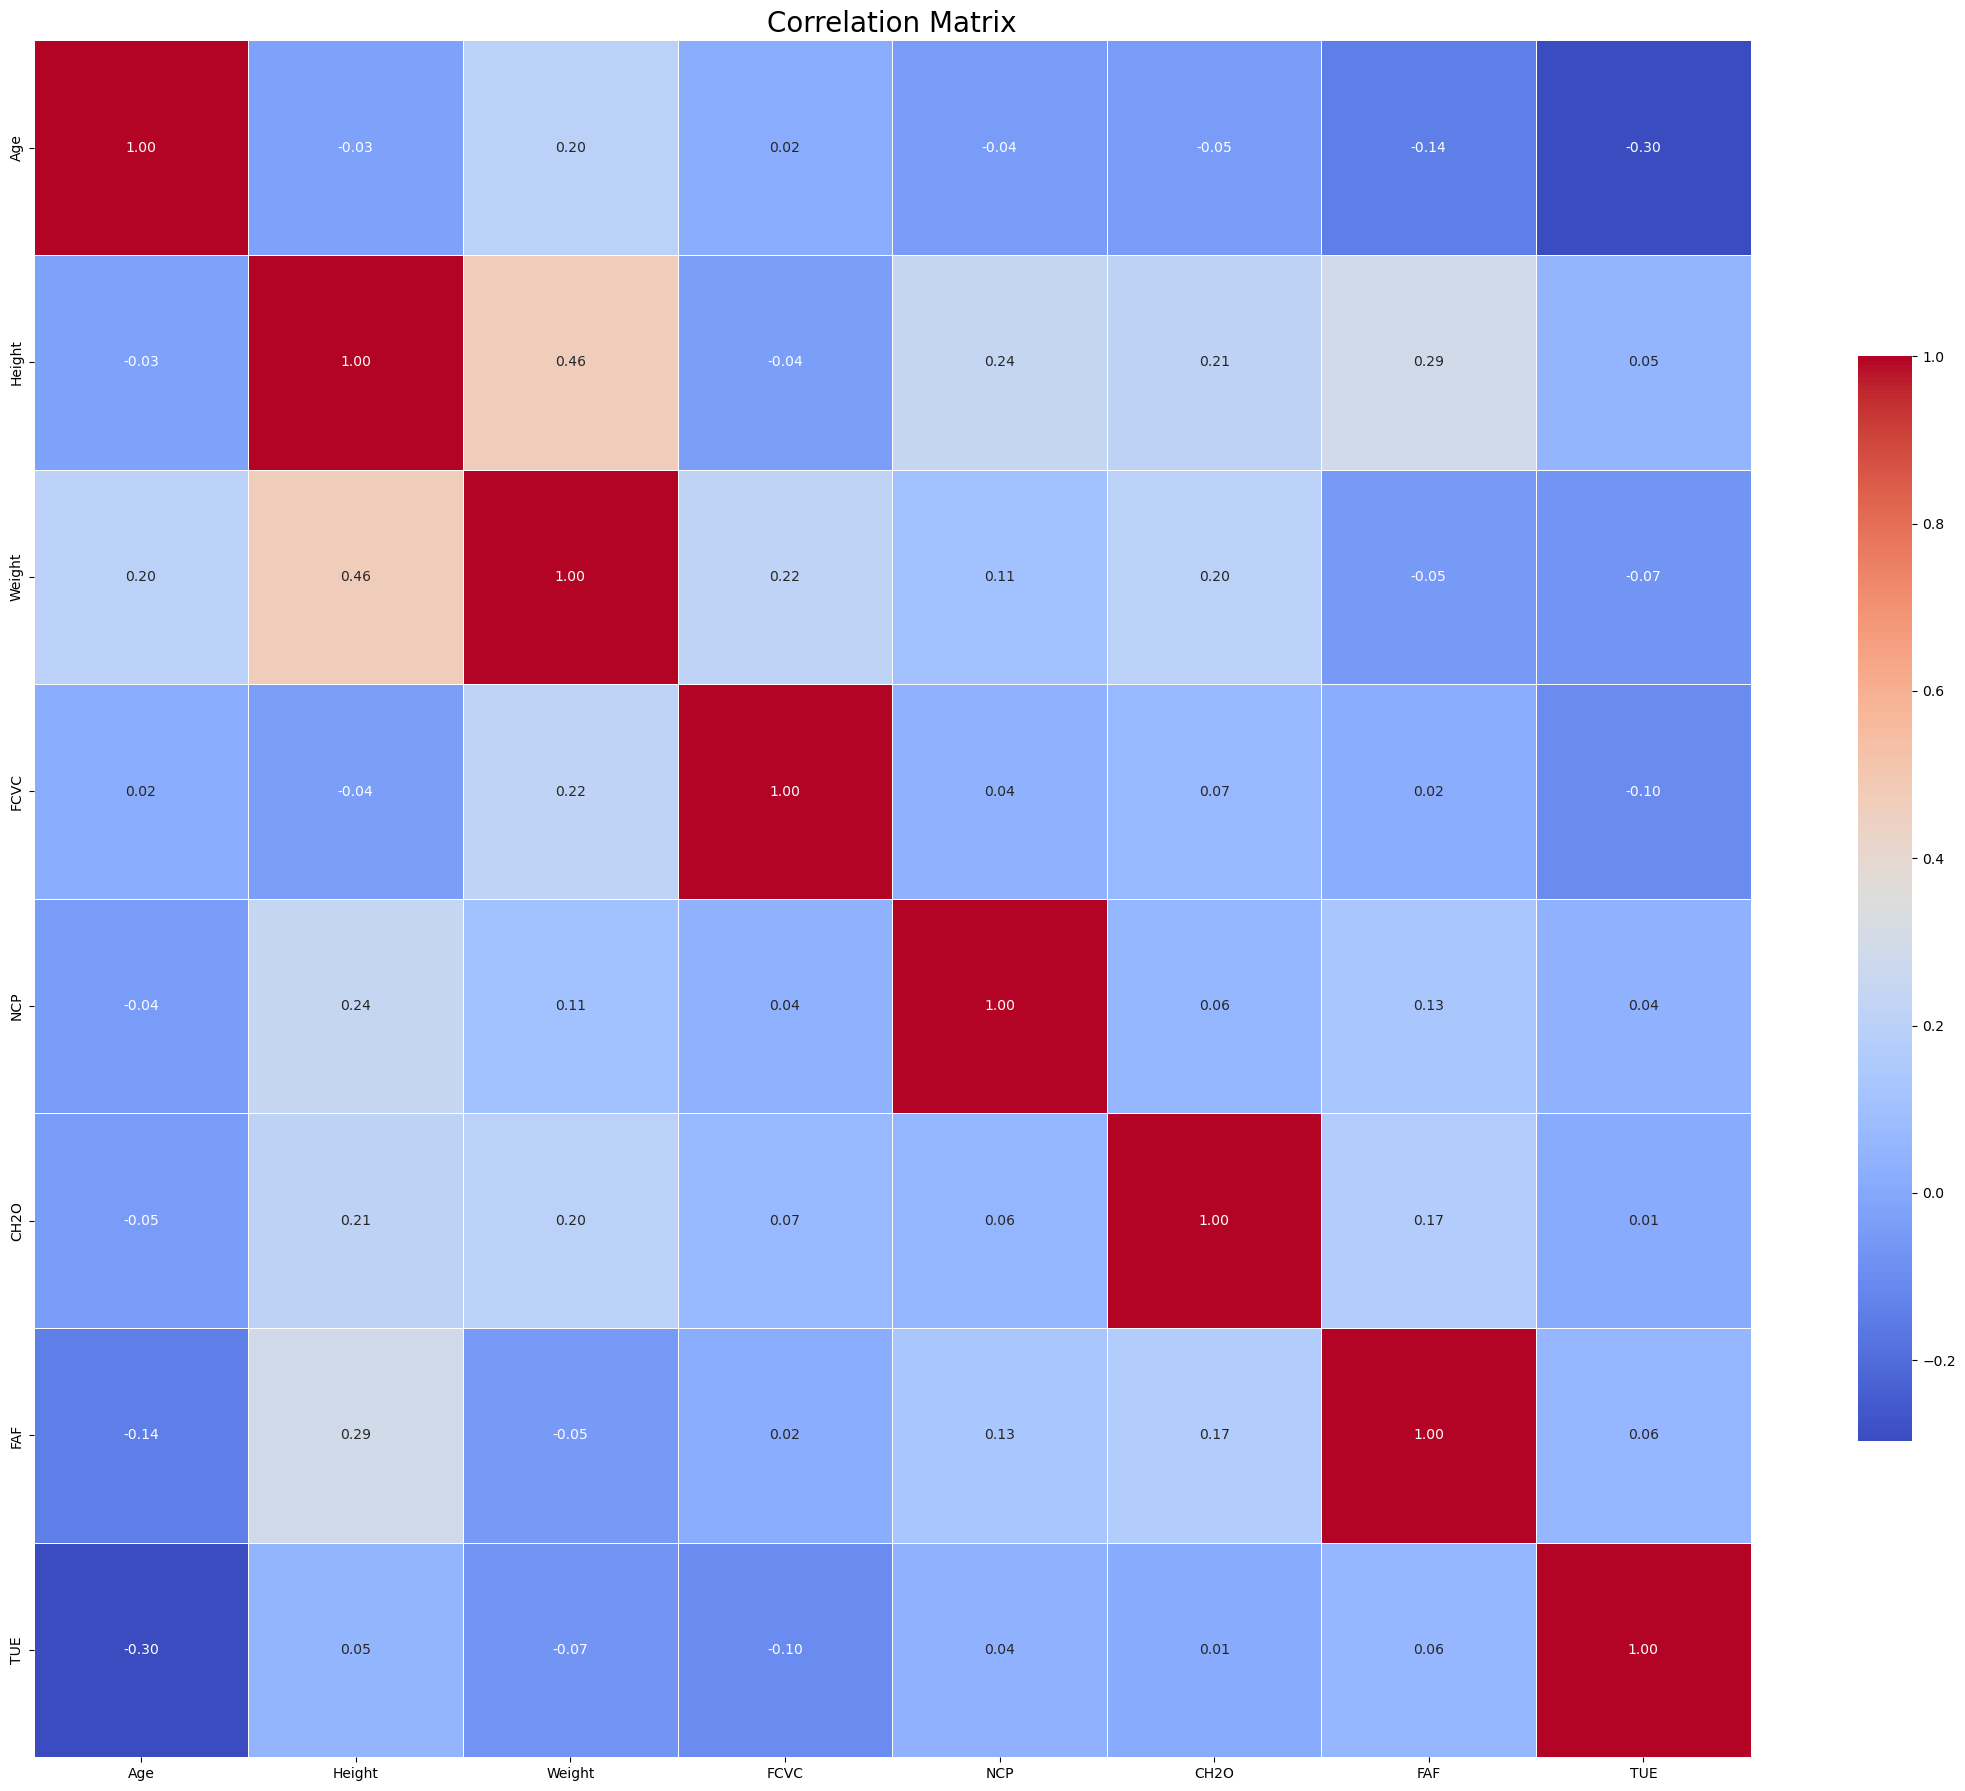

In [5]:
# Summary statistics
print("Summary Statistics:")
# Use pandas Styler for a nicer display in Jupyter Notebook
styled_summary = df.describe().style.background_gradient(cmap='coolwarm')
display(styled_summary)

# Identify the target variable
target = 'Target'  

if target in df.columns:
    plt.figure(figsize=(6,4))
    # Use a palette that provides distinct colors for each class
    sns.countplot(x=target, data=df, palette='Set2')
    plt.title('Class Distribution', fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
    # Check for class imbalance
    class_counts = df[target].value_counts()
    print("\nClass Counts:\n", class_counts)
else:
    print(f"Target column '{target}' not found in the dataset.")

# Visualize correlations with improved aesthetics
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(22,22))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### Data Preparation and  Visualization

In [6]:
target = 'NObeyesdad'
# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Encode the target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Split the data (80% training, 20% testing) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training set shape: (1688, 16)
Testing set shape: (423, 16)
Training target shape: (1688,)
Testing target shape: (423,)


In [7]:
# Display the classes and their corresponding encoded values
target_classes = le_target.classes_
encoded_values = le_target.transform(target_classes)
mapping = dict(zip(target_classes, encoded_values))
print("\nTarget Variable Encoding Mapping:")
for class_label, encoded in mapping.items():
    print(f"{class_label} --> {encoded}")
    
# Display the first few rows to verify encoding
df[[target]].head()


Target Variable Encoding Mapping:
Insufficient_Weight --> 0
Normal_Weight --> 1
Obesity_Type_I --> 2
Obesity_Type_II --> 3
Obesity_Type_III --> 4
Overweight_Level_I --> 5
Overweight_Level_II --> 6


NObeyesdad
0        Normal_Weight
1        Normal_Weight
2        Normal_Weight
3   Overweight_Level_I
4  Overweight_Level_II

In [8]:
# Assuming X_train is a pandas DataFrame
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [9]:
# Initialize the encoder
label_encoder = LabelEncoder()

# Encode each categorical column
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.fit_transform(X_test[col])


In [10]:
# Assuming X_train is a pandas DataFrame
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index([], dtype='object')


In [11]:
X_train.head()

Gender        Age    Height     Weight  family_history_with_overweight  \
459       1  19.000000  1.760000  79.000000                               1   
426       1  22.000000  1.750000  70.000000                               0   
326       1  18.000000  1.700000  55.300000                               1   
971       1  19.506389  1.824449  87.656029                               1   
892       0  17.085250  1.535618  57.259124                               0   

     FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
459     1  2.000000  3.000000     1      0  3.000000    0  1.000000  2.000000   
426     0  2.000000  3.000000     2      0  3.000000    0  1.000000  1.000000   
326     1  3.000000  3.000000     2      0  2.000000    0  3.000000  0.000000   
971     1  2.793561  3.788602     2      0  2.429059    0  2.094542  0.393358   
892     1  1.972545  2.339614     2      0  1.711074    1  0.095517  1.191053   

     CALC  MTRANS  
459     1       3  
426     3       3  
326     2       3  
971     2       3  
892     2       3

In [12]:
y_train

array([5, 1, 1, ..., 0, 3, 1])

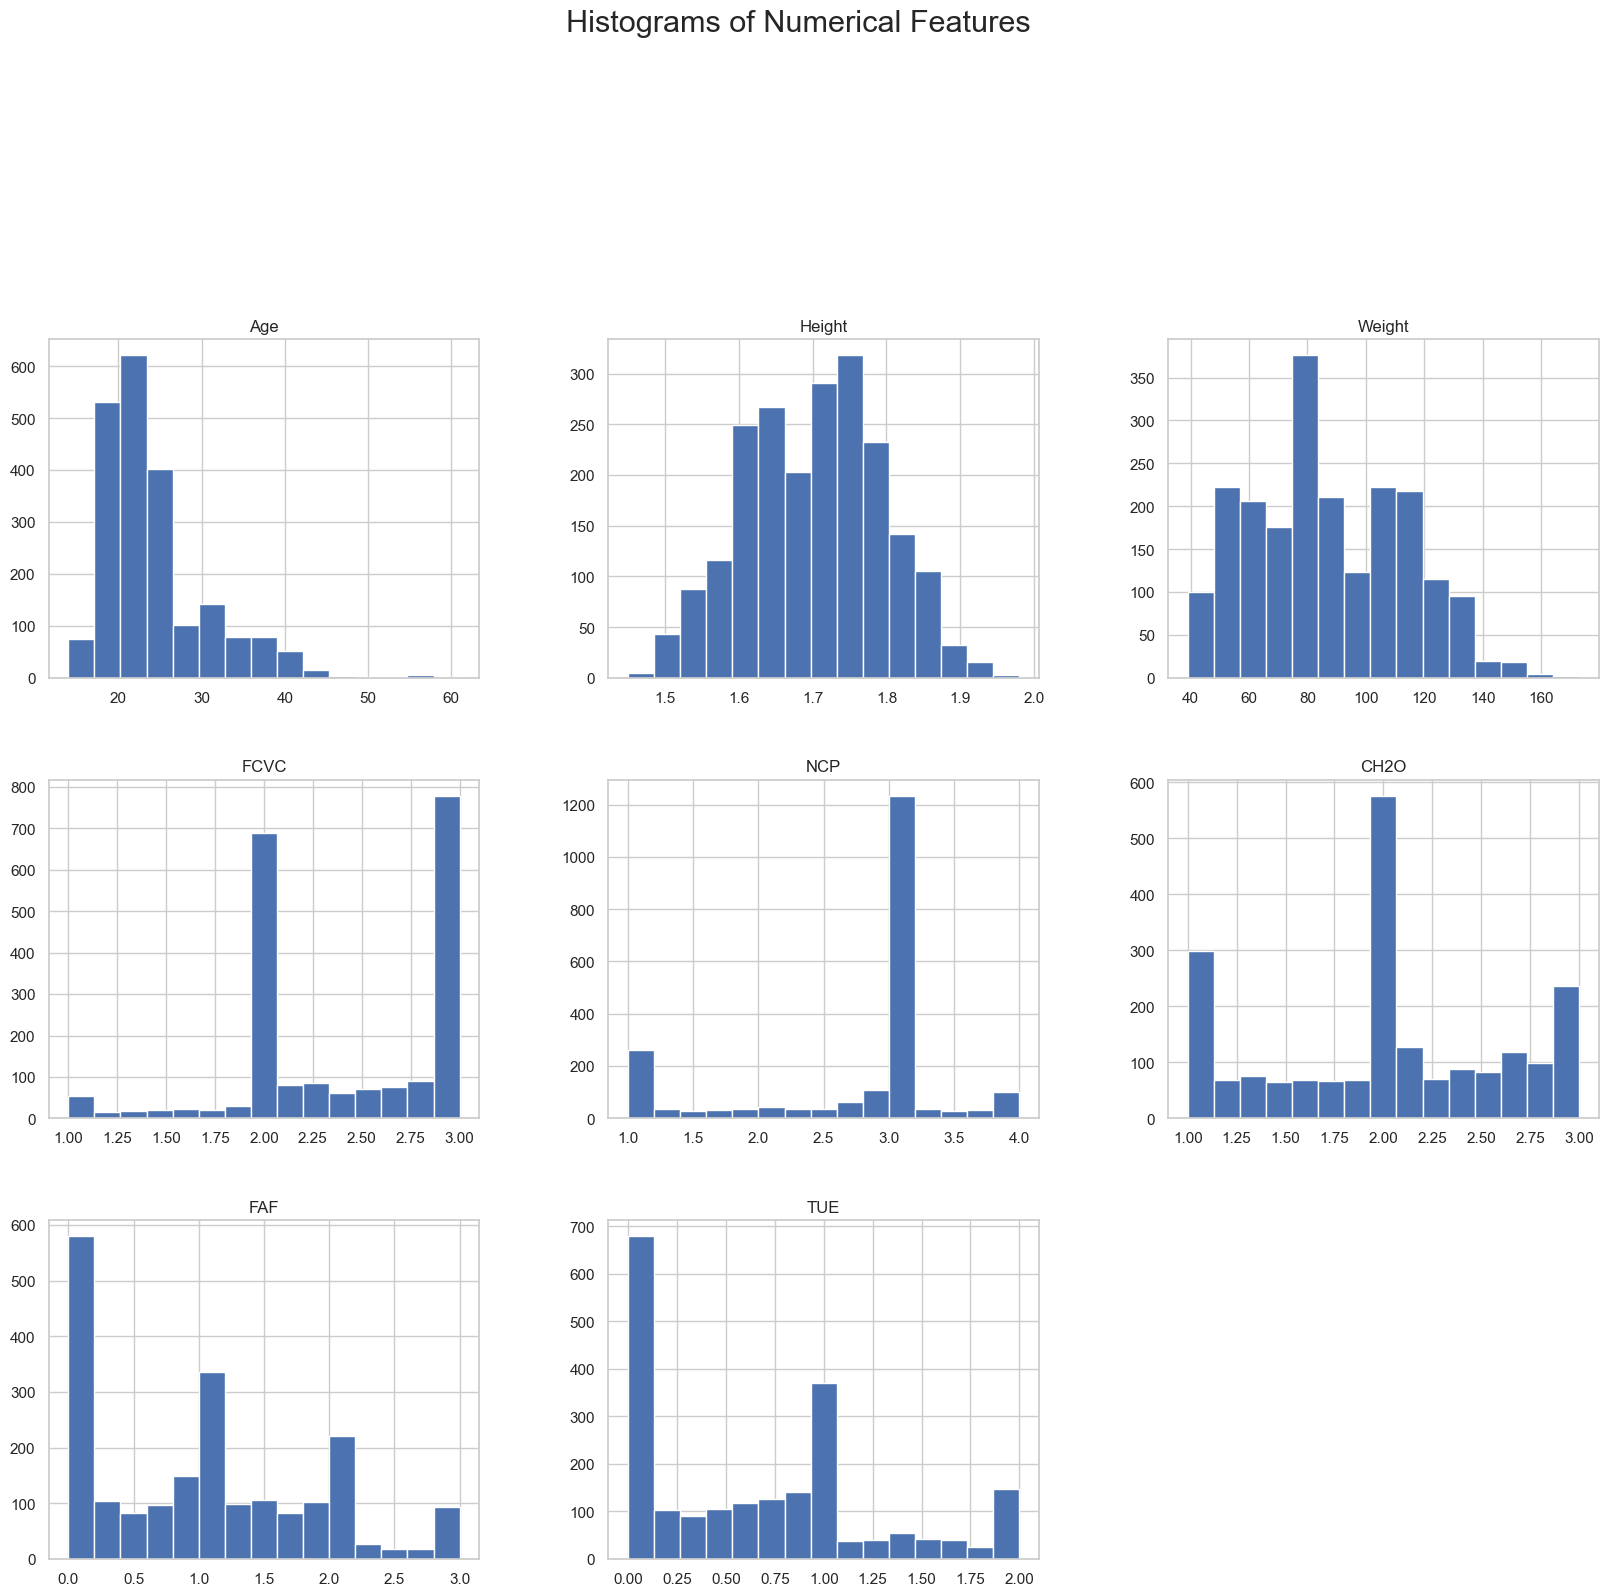

In [13]:
# List of numerical features
numerical_features = X.columns.tolist()

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Plot histograms for each numerical feature
df[numerical_features].hist(bins=15, figsize=(20, 33), layout=(int(np.ceil(len(numerical_features)/3)), 3))
plt.suptitle('Histograms of Numerical Features', fontsize=22)
plt.show()


C:\Users\nikip\AppData\Local\Temp\ipykernel_5488\1236777828.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi_df, palette="viridis")


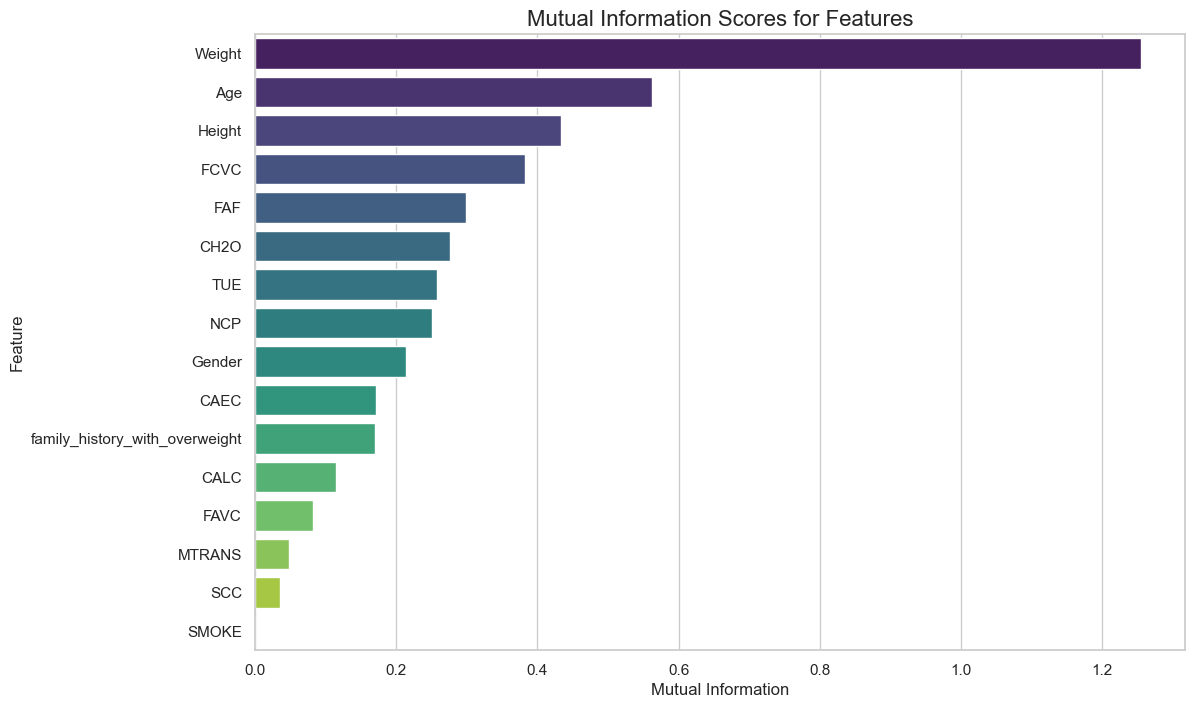

In [14]:
mi = mutual_info_classif(X_train, y_train, random_state=42)

# Create a DataFrame for visualization
mi_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Plot mutual information scores
plt.figure(figsize=(12, 8))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df, palette="viridis")
plt.title('Mutual Information Scores for Features', fontsize=16)
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.show()


### PCA and t-SNE Application

Lambda Values (Eigenvalues) of the PCA:
   Principal Component  Eigenvalue (Lambda)
0                  PC1           680.625706
1                  PC2            39.806423
2                  PC3             1.050533
3                  PC4             0.719180
4                  PC5             0.557819
5                  PC6             0.371432
6                  PC7             0.342648
7                  PC8             0.304436
8                  PC9             0.251455
9                 PC10             0.186642
10                PC11             0.152765
11                PC12             0.102149
12                PC13             0.089545
13                PC14             0.039254
14                PC15             0.020307
15                PC16             0.003259


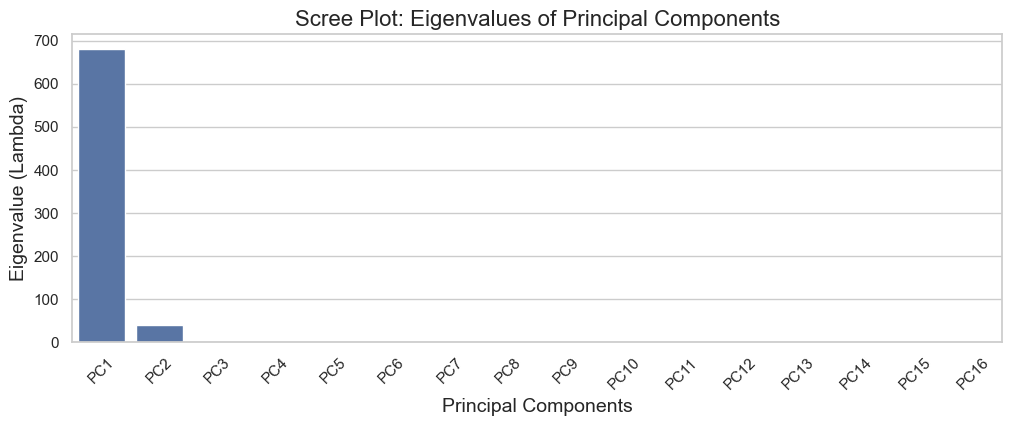

In [15]:
# Assuming X contains the feature set after preprocessing
# Perform PCA with all components to get all eigenvalues
pca_full = PCA(n_components=None, random_state=42)
pca_full.fit(X_train)

# Retrieve the eigenvalues (lambda values)
eigenvalues = pca_full.explained_variance_

# Create a DataFrame for better visualization
lambda_df = pd.DataFrame({
    'Principal Component': [f'PC{i}' for i in range(1, len(eigenvalues)+1)],
    'Eigenvalue (Lambda)': eigenvalues
})

# Display the eigenvalues
print("Lambda Values (Eigenvalues) of the PCA:")
print(lambda_df)

# Plot the eigenvalues
plt.figure(figsize=(12, 4))
sns.barplot(x='Principal Component', y='Eigenvalue (Lambda)', data=lambda_df)
plt.title('Scree Plot: Eigenvalues of Principal Components', fontsize=16)
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Eigenvalue (Lambda)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


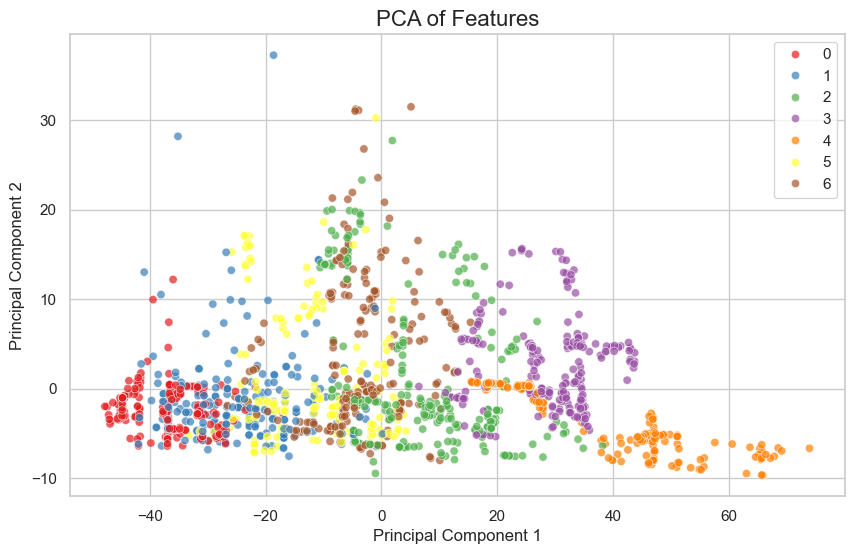

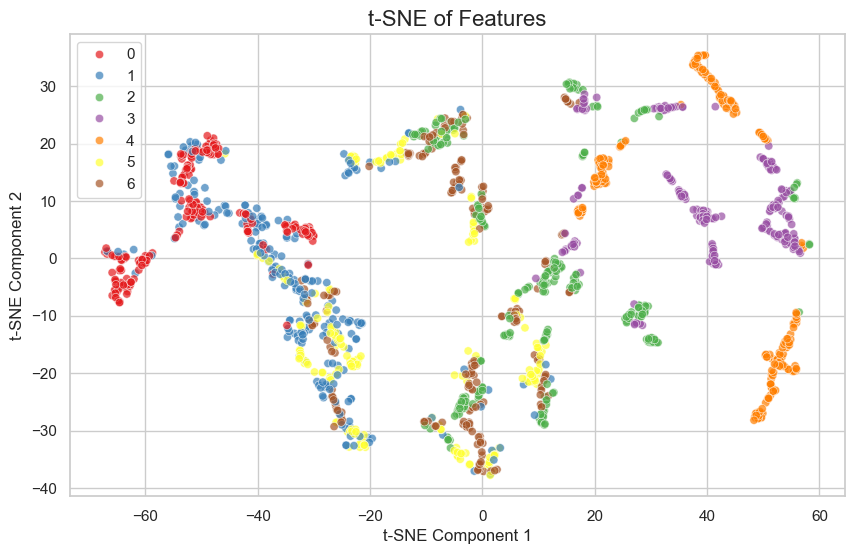

In [16]:
# PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train)

# Plot PCA results
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train, palette="Set1", alpha=0.7)
plt.title('PCA of Features', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_train)

# Plot t-SNE results
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_train, palette="Set1", alpha=0.7)
plt.title('t-SNE of Features', fontsize=16)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


# Machine Learning Models

## Distance Based Models

### kNN

In [17]:
# Function to plot ROC Curve for multiclass
def plot_roc_multiclass(y_true, y_probs, n_classes, model_name, labels):
    # Binarize the output
    y_true_bin = label_binarize(y_true, classes=labels)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {labels[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity/Recall)')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Set plot style
sns.set_theme(style="whitegrid")

In [18]:
# **Training the Base kNN Model**

# Initialize the base kNN model with default parameters
knn_base = KNeighborsClassifier()

# Train the model on the training data
knn_base.fit(X_train, y_train)

# Make predictions on the test set
y_pred_base = knn_base.predict(X_test)

# Predict probabilities for ROC Curve
y_probs_base = knn_base.predict_proba(X_test)


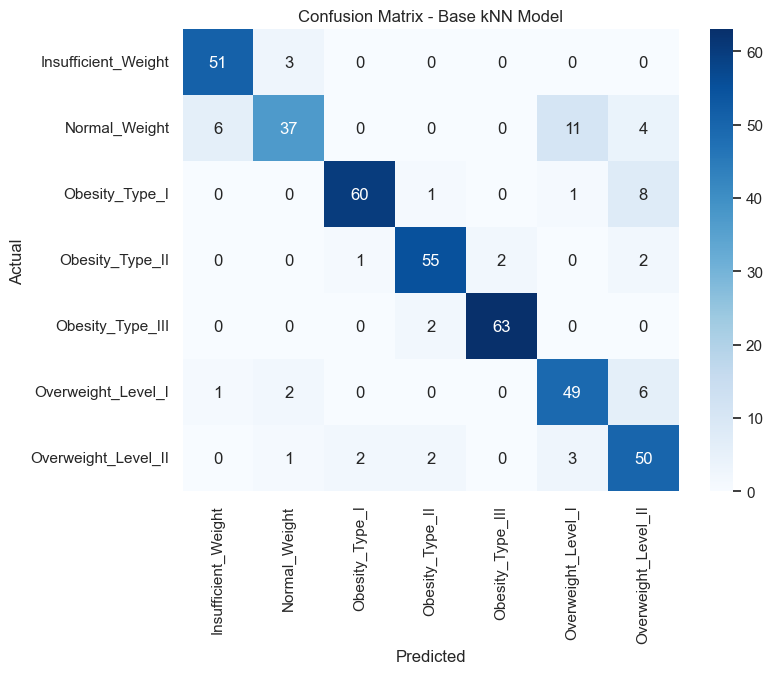

Base kNN Model Accuracy: 0.86
Base kNN Model F1 Score: 0.86
Base kNN Model Precision: 0.87
Base kNN Model Recall: 0.86


In [19]:
# **Confusion Matrix for Base kNN Model**

cm_base = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Base kNN Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

labels = np.unique(y_test)
knn_accuracy_base = accuracy_score(y_test, y_pred_base)
knn_f1_base = f1_score(y_test, y_pred_base, average='weighted')
knn_precision_base = precision_score(y_test, y_pred_base, average='weighted')
knn_recall_base = recall_score(y_test, y_pred_base, average='weighted')

print(f"Base kNN Model Accuracy: {knn_accuracy_base:.2f}")
print(f"Base kNN Model F1 Score: {knn_f1_base:.2f}")
print(f"Base kNN Model Precision: {knn_precision_base:.2f}")
print(f"Base kNN Model Recall: {knn_recall_base:.2f}")

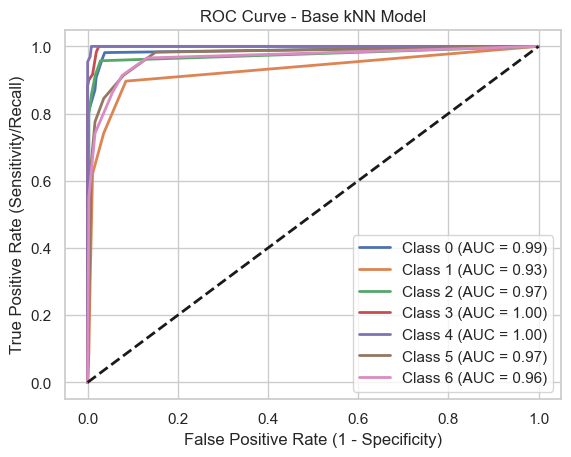

In [20]:
# **ROC Curve for Base kNN Model**

n_classes = len(labels)
plot_roc_multiclass(y_test, y_probs_base, n_classes, 'Base kNN Model', labels)


In [21]:
# **Training the Adjusted kNN Model**

# Initialize the adjusted kNN model with tuned hyperparameters
knn_adjusted = KNeighborsClassifier(n_neighbors=10, weights='uniform')

# Train the model on the training data
knn_adjusted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adjusted = knn_adjusted.predict(X_test)

# Predict probabilities for ROC Curve
y_probs_adjusted = knn_adjusted.predict_proba(X_test)


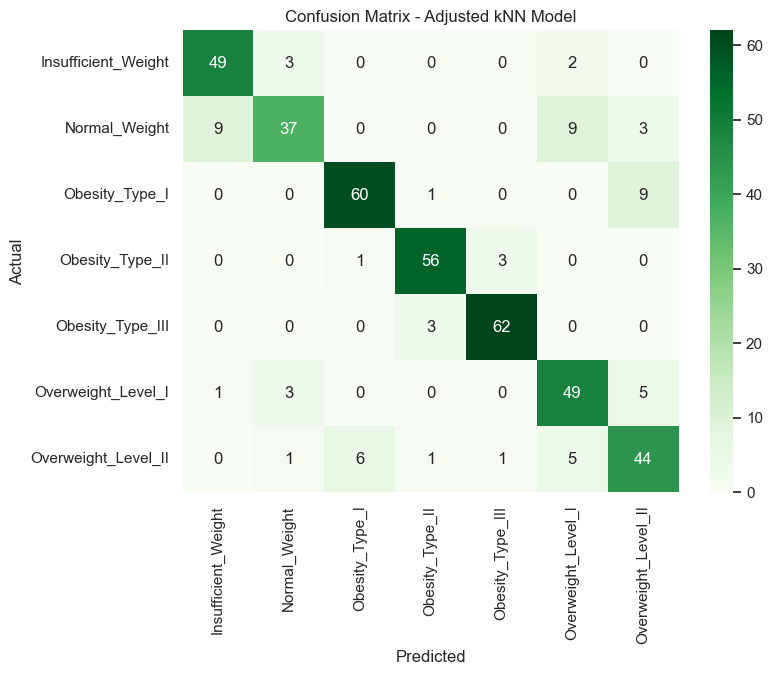

Adjusted kNN Model Accuracy: 0.84
Adjusted kNN Model F1 Score: 0.84
Adjusted kNN Model Precision: 0.85
Adjusted kNN Model Recall: 0.84


In [22]:
# **Confusion Matrix for Adjusted kNN Model**

cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm_adjusted, annot=True, fmt='d', cmap='Greens', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Adjusted kNN Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

knn_accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
knn_f1_adjusted = f1_score(y_test, y_pred_adjusted, average='weighted')
knn_precision_adjusted = precision_score(y_test, y_pred_adjusted, average='weighted')
knn_recall_adjusted = recall_score(y_test, y_pred_adjusted, average='weighted')

print(f"Adjusted kNN Model Accuracy: {knn_accuracy_adjusted:.2f}")
print(f"Adjusted kNN Model F1 Score: {knn_f1_adjusted:.2f}")
print(f"Adjusted kNN Model Precision: {knn_precision_adjusted:.2f}")
print(f"Adjusted kNN Model Recall: {knn_recall_adjusted:.2f}")


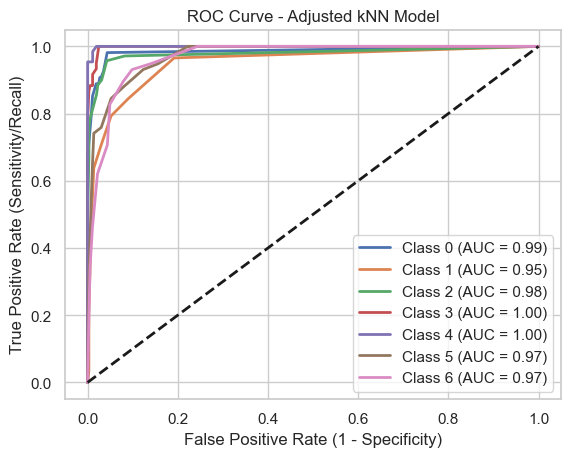

In [23]:
# **ROC Curve for Adjusted kNN Model**

plot_roc_multiclass(y_test, y_probs_adjusted, n_classes, 'Adjusted kNN Model', labels)

### Centroid Classifier

In [24]:
# **Training the Base Centroid Classifier**

# Initialize the base Nearest Centroid classifier with default parameters
centroid_base = NearestCentroid()

# Train the model on the training data
centroid_base.fit(X_train, y_train)

# Make predictions on the test set
y_pred_centroid_base = centroid_base.predict(X_test)


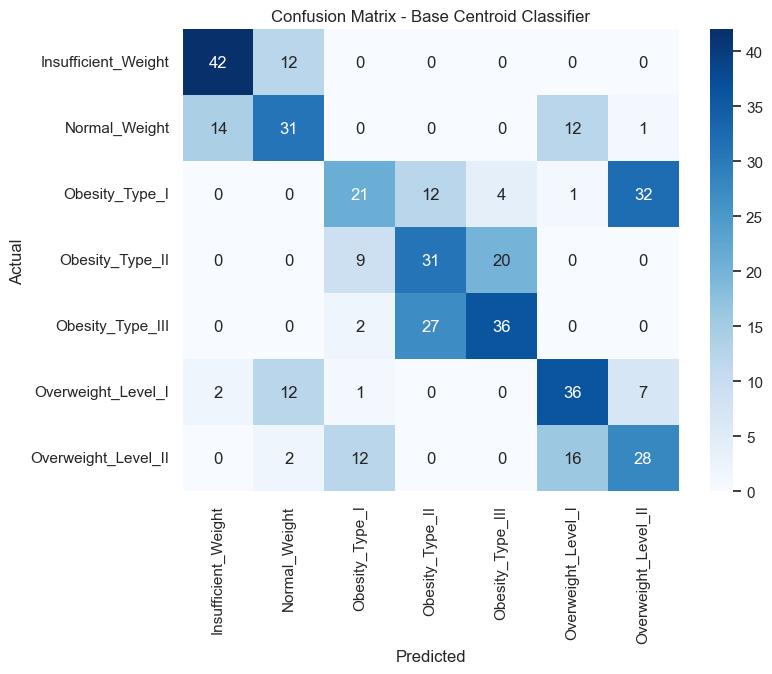

Base Centroid Classifier Accuracy: 0.53
Base Centroid Classifier F1 Score: 0.53
Base Centroid Classifier Precision: 0.53
Base Centroid Classifier Recall: 0.53


In [25]:
# **Confusion Matrix for Base Centroid Classifier**

cm_centroid_base = confusion_matrix(y_test, y_pred_centroid_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm_centroid_base, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Base Centroid Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

labels = np.unique(y_test)
accuracy_centroid_base = accuracy_score(y_test, y_pred_centroid_base)
f1_centroid_base = f1_score(y_test, y_pred_centroid_base, average='weighted')
precision_centroid_base = precision_score(y_test, y_pred_centroid_base, average='weighted')
recall_centroid_base = recall_score(y_test, y_pred_centroid_base, average='weighted')

print(f"Base Centroid Classifier Accuracy: {accuracy_centroid_base:.2f}")
print(f"Base Centroid Classifier F1 Score: {f1_centroid_base:.2f}")
print(f"Base Centroid Classifier Precision: {precision_centroid_base:.2f}")
print(f"Base Centroid Classifier Recall: {recall_centroid_base:.2f}")


In [26]:
# **2. Training the Adjusted Centroid Classifier**

# Initialize the adjusted Nearest Centroid classifier with tuned hyperparameters
centroid_adjusted = NearestCentroid(metric='cosine', shrink_threshold=0.5)

# Train the model on the training data
centroid_adjusted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_centroid_adjusted = centroid_adjusted.predict(X_test)


c:\Users\nikip\miniforge3\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\nikip\miniforge3\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


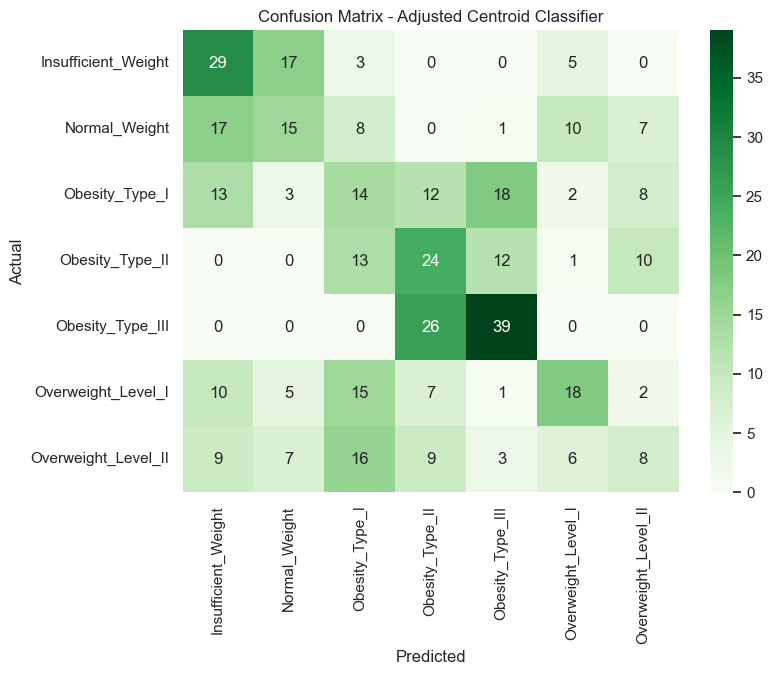

Adjusted Centroid Classifier Accuracy: 0.35
Adjusted Centroid Classifier F1 Score: 0.34
Adjusted Centroid Classifier Precision: 0.34
Adjusted Centroid Classifier Recall: 0.35


In [27]:
# **Confusion Matrix for Adjusted Centroid Classifier**

cm_centroid_adjusted = confusion_matrix(y_test, y_pred_centroid_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm_centroid_adjusted, annot=True, fmt='d', cmap='Greens', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Adjusted Centroid Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_centroid_adjusted = accuracy_score(y_test, y_pred_centroid_adjusted)
f1_centroid_adjusted = f1_score(y_test, y_pred_centroid_adjusted, average='weighted')
precision_centroid_adjusted = precision_score(y_test, y_pred_centroid_adjusted, average='weighted')
recall_centroid_adjusted = recall_score(y_test, y_pred_centroid_adjusted, average='weighted')

print(f"Adjusted Centroid Classifier Accuracy: {accuracy_centroid_adjusted:.2f}")
print(f"Adjusted Centroid Classifier F1 Score: {f1_centroid_adjusted:.2f}")
print(f"Adjusted Centroid Classifier Precision: {precision_centroid_adjusted:.2f}")
print(f"Adjusted Centroid Classifier Recall: {recall_centroid_adjusted:.2f}")


## Probability Based Models

### Naive Bayes Classifier (GaussianNB)

In [28]:
# **Training the Base GNB Model**

# Initialize the base Gaussian Naive Bayes classifier with default parameters
gnb_base = GaussianNB()

# Train the model on the training data
gnb_base.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gnb_base = gnb_base.predict(X_test)

# Predict probabilities for ROC Curve
y_probs_gnb_base = gnb_base.predict_proba(X_test)


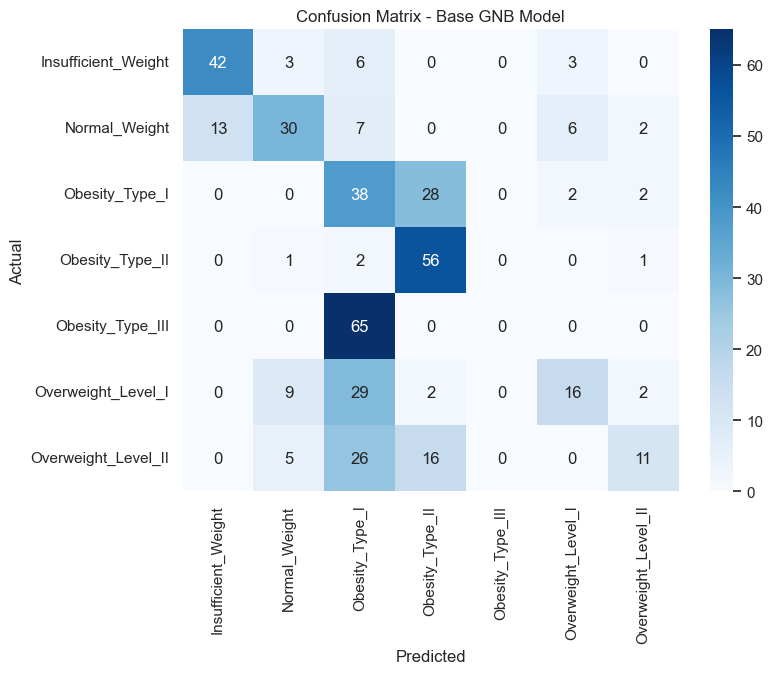

Base GNB Model Accuracy: 0.46
Base GNB Model F1 Score: 0.42
Base GNB Model Precision: 0.46
Base GNB Model Recall: 0.46


c:\Users\nikip\miniforge3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
# **Confusion Matrix for Base GNB Model**

cm_gnb_base = confusion_matrix(y_test, y_pred_gnb_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm_gnb_base, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Base GNB Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

labels = np.unique(y_test)
accuracy_gnb_base = accuracy_score(y_test, y_pred_gnb_base)
f1_gnb_base = f1_score(y_test, y_pred_gnb_base, average='weighted')
precision_gnb_base = precision_score(y_test, y_pred_gnb_base, average='weighted')
recall_gnb_base = recall_score(y_test, y_pred_gnb_base, average='weighted')

print(f"Base GNB Model Accuracy: {accuracy_gnb_base:.2f}")
print(f"Base GNB Model F1 Score: {f1_gnb_base:.2f}")
print(f"Base GNB Model Precision: {precision_gnb_base:.2f}")
print(f"Base GNB Model Recall: {recall_gnb_base:.2f}")


In [30]:
# **Training the Adjusted GNB Model**

# Initialize the adjusted Gaussian Naive Bayes classifier with tuned hyperparameters
gnb_adjusted = GaussianNB(var_smoothing=1e-5)

# Train the model on the training data
gnb_adjusted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gnb_adjusted = gnb_adjusted.predict(X_test)

# Predict probabilities for ROC Curve
y_probs_gnb_adjusted = gnb_adjust_proba = gnb_adjusted.predict_proba(X_test)


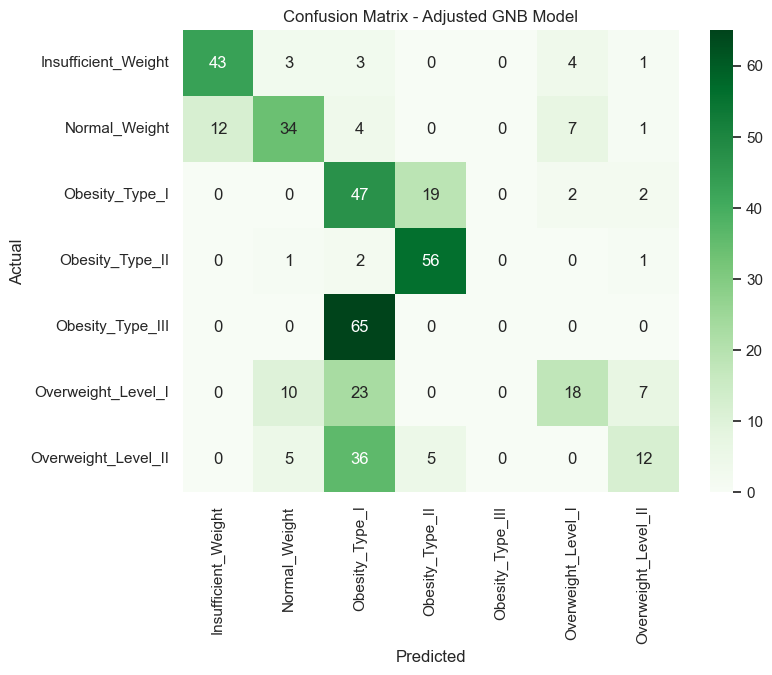

Adjusted GNB Model Accuracy: 0.50
Adjusted GNB Model F1 Score: 0.46
Adjusted GNB Model Precision: 0.48
Adjusted GNB Model Recall: 0.50


c:\Users\nikip\miniforge3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# **Confusion Matrix for Adjusted GNB Model**

cm_gnb_adjusted = confusion_matrix(y_test, y_pred_gnb_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm_gnb_adjusted, annot=True, fmt='d', cmap='Greens', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Adjusted GNB Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_gnb_adjusted = accuracy_score(y_test, y_pred_gnb_adjusted)
f1_gnb_adjusted = f1_score(y_test, y_pred_gnb_adjusted, average='weighted')
precision_gnb_adjusted = precision_score(y_test, y_pred_gnb_adjusted, average='weighted')
recall_gnb_adjusted = recall_score(y_test, y_pred_gnb_adjusted, average='weighted')

print(f"Adjusted GNB Model Accuracy: {accuracy_gnb_adjusted:.2f}")
print(f"Adjusted GNB Model F1 Score: {f1_gnb_adjusted:.2f}")
print(f"Adjusted GNB Model Precision: {precision_gnb_adjusted:.2f}")
print(f"Adjusted GNB Model Recall: {recall_gnb_adjusted:.2f}")


### Linear Discriminant Analysis (LDA)

In [32]:
# **Training the Base LDA Model**

# Initialize the base Linear Discriminant Analysis classifier with default parameters
lda_base = LinearDiscriminantAnalysis()

# Train the model on the training data
lda_base.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lda_base = lda_base.predict(X_test)

# Predict probabilities for ROC Curve
y_probs_lda_base = lda_base.predict_proba(X_test)


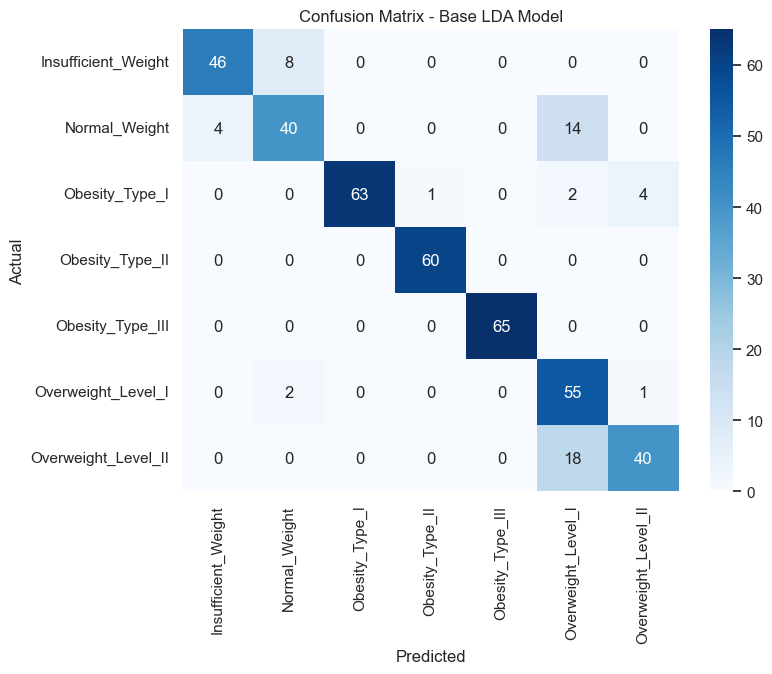

Base LDA Model Accuracy: 0.87
Base LDA Model F1 Score: 0.87
Base LDA Model Precision: 0.89
Base LDA Model Recall: 0.87


In [33]:
# **Confusion Matrix for Base LDA Model**

cm_lda_base = confusion_matrix(y_test, y_pred_lda_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm_lda_base, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Base LDA Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

labels = np.unique(y_test)
accuracy_lda_base = accuracy_score(y_test, y_pred_lda_base)
f1_lda_base = f1_score(y_test, y_pred_lda_base, average='weighted')
precision_lda_base = precision_score(y_test, y_pred_lda_base, average='weighted')
recall_lda_base = recall_score(y_test, y_pred_lda_base, average='weighted')

print(f"Base LDA Model Accuracy: {accuracy_lda_base:.2f}")
print(f"Base LDA Model F1 Score: {f1_lda_base:.2f}")
print(f"Base LDA Model Precision: {precision_lda_base:.2f}")
print(f"Base LDA Model Recall: {recall_lda_base:.2f}")


In [34]:
# **Training the Adjusted LDA Model**

# Initialize the adjusted Linear Discriminant Analysis classifier with tuned hyperparameters
lda_adjusted = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')

# Train the model on the training data
lda_adjusted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lda_adjusted = lda_adjusted.predict(X_test)

# Predict probabilities for ROC Curve
y_probs_lda_adjusted = lda_adjusted.predict_proba(X_test)


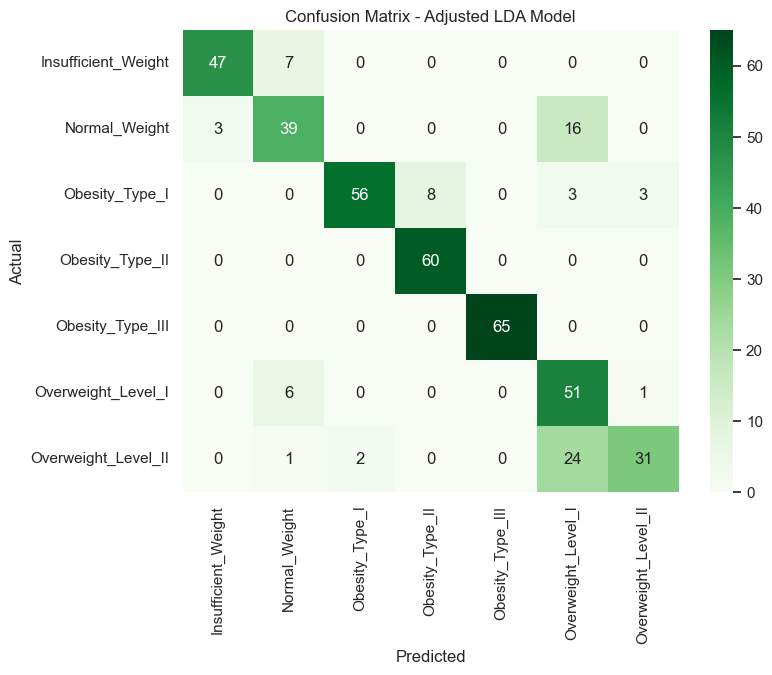

Adjusted LDA Model Accuracy: 0.83
Adjusted LDA Model F1 Score: 0.83
Adjusted LDA Model Precision: 0.86
Adjusted LDA Model Recall: 0.83


In [35]:
# **Confusion Matrix for Adjusted LDA Model**

cm_lda_adjusted = confusion_matrix(y_test, y_pred_lda_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm_lda_adjusted, annot=True, fmt='d', cmap='Greens', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Adjusted LDA Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_lda_adjusted = accuracy_score(y_test, y_pred_lda_adjusted)
f1_lda_adjusted = f1_score(y_test, y_pred_lda_adjusted, average='weighted')
precision_lda_adjusted = precision_score(y_test, y_pred_lda_adjusted, average='weighted')
recall_lda_adjusted = recall_score(y_test, y_pred_lda_adjusted, average='weighted')

print(f"Adjusted LDA Model Accuracy: {accuracy_lda_adjusted:.2f}")
print(f"Adjusted LDA Model F1 Score: {f1_lda_adjusted:.2f}")
print(f"Adjusted LDA Model Precision: {precision_lda_adjusted:.2f}")
print(f"Adjusted LDA Model Recall: {recall_lda_adjusted:.2f}")


### MultiClass Logistic Regression

In [36]:
# **Training the Base Logistic Regression Model**

# Initialize the base Logistic Regression classifier with multinomial option
logreg_base = LogisticRegression(
    multi_class='multinomial',
    random_state=42
)

# Train the model on the training data
logreg_base.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg_base = logreg_base.predict(X_test)


c:\Users\nikip\miniforge3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


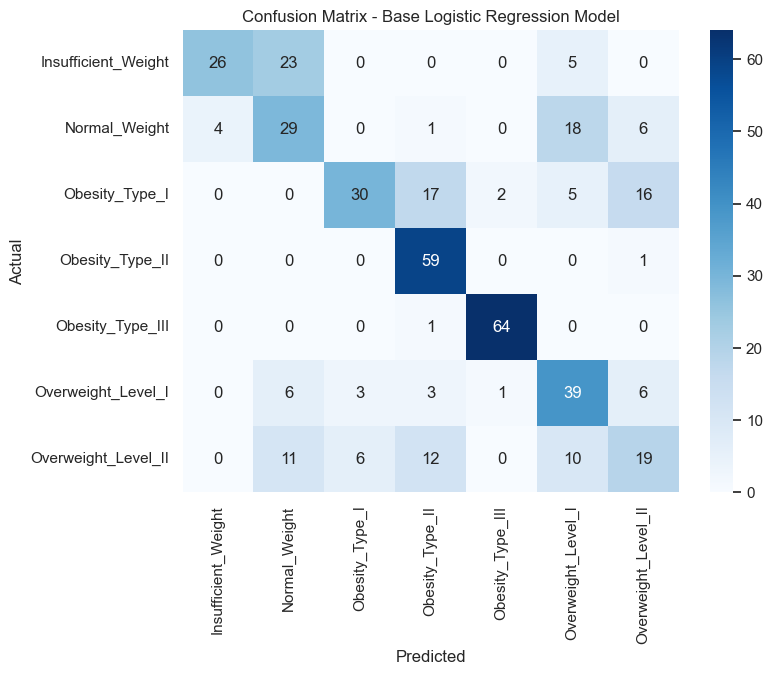

Base Logistic Regression Model Accuracy: 0.63
Base Logistic Regression Model F1 Score: 0.62
Base Logistic Regression Model Precision: 0.66
Base Logistic Regression Model Recall: 0.63


In [37]:
# **Confusion Matrix for Base Logistic Regression Model**

cm_logreg_base = confusion_matrix(y_test, y_pred_logreg_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm_logreg_base, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Base Logistic Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

labels = np.unique(y_test)
accuracy_logreg_base = accuracy_score(y_test, y_pred_logreg_base)
f1_logreg_base = f1_score(y_test, y_pred_logreg_base, average='weighted')
precision_logreg_base = precision_score(y_test, y_pred_logreg_base, average='weighted')
recall_logreg_base = recall_score(y_test, y_pred_logreg_base, average='weighted')

print(f"Base Logistic Regression Model Accuracy: {accuracy_logreg_base:.2f}")
print(f"Base Logistic Regression Model F1 Score: {f1_logreg_base:.2f}")
print(f"Base Logistic Regression Model Precision: {precision_logreg_base:.2f}")
print(f"Base Logistic Regression Model Recall: {recall_logreg_base:.2f}")


In [38]:
# **Training the Adjusted Logistic Regression Model**

# Initialize the adjusted Logistic Regression classifier with tuned hyperparameters
logreg_adjusted = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    penalty='l2',       # L2 regularization (default)
    C=0.8,              # Regularization strength
    max_iter=100000,
    random_state=42
)

# Train the model on the training data
logreg_adjusted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg_adjusted = logreg_adjusted.predict(X_test)


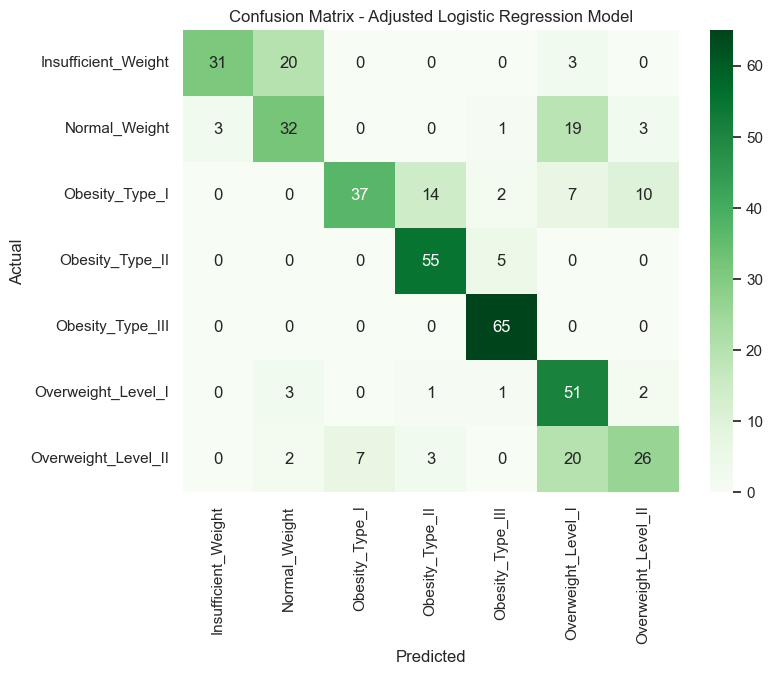

Adjusted Logistic Regression Model Accuracy: 0.70
Adjusted Logistic Regression Model F1 Score: 0.70
Adjusted Logistic Regression Model Precision: 0.73
Adjusted Logistic Regression Model Recall: 0.70


In [39]:
# **Confusion Matrix for Adjusted Logistic Regression Model**

cm_logreg_adjusted = confusion_matrix(y_test, y_pred_logreg_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm_logreg_adjusted, annot=True, fmt='d', cmap='Greens', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Adjusted Logistic Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_logreg_adjusted = accuracy_score(y_test, y_pred_logreg_adjusted)
f1_logreg_adjusted = f1_score(y_test, y_pred_logreg_adjusted, average='weighted')
precision_logreg_adjusted = precision_score(y_test, y_pred_logreg_adjusted, average='weighted')
recall_logreg_adjusted = recall_score(y_test, y_pred_logreg_adjusted, average='weighted')

print(f"Adjusted Logistic Regression Model Accuracy: {accuracy_logreg_adjusted:.2f}")
print(f"Adjusted Logistic Regression Model F1 Score: {f1_logreg_adjusted:.2f}")
print(f"Adjusted Logistic Regression Model Precision: {precision_logreg_adjusted:.2f}")
print(f"Adjusted Logistic Regression Model Recall: {recall_logreg_adjusted:.2f}")


## Rule Based Models (Bagging)

### Bagging with kNN

In [40]:
# **Training the Base Bagging kNN Model**

# Initialize the base kNN estimator
knn_estimator_base = KNeighborsClassifier()

# Initialize the base Bagging Classifier with default parameters
bagging_knn_base = BaggingClassifier(
    estimator=knn_estimator_base,
    random_state=42
)

# Train the model on the training data
bagging_knn_base.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging_knn_base = bagging_knn_base.predict(X_test)


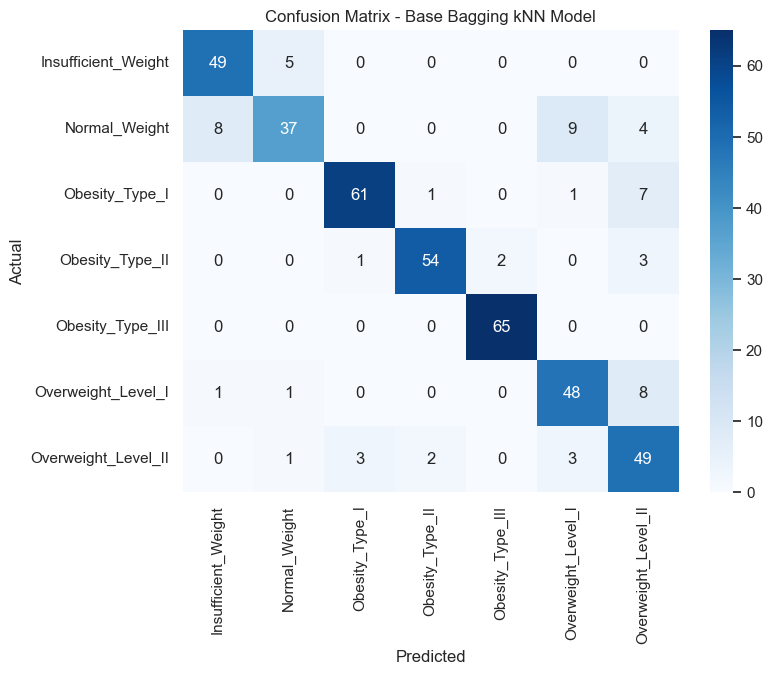

Base Bagging kNN Model Accuracy: 0.86
Base Bagging kNN Model F1 Score: 0.86
Base Bagging kNN Model Precision: 0.86
Base Bagging kNN Model Recall: 0.86


In [41]:
# **Confusion Matrix for Base Bagging kNN Model**

cm_bagging_knn_base = confusion_matrix(y_test, y_pred_bagging_knn_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bagging_knn_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Base Bagging kNN Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_bagging_knn_base = accuracy_score(y_test, y_pred_bagging_knn_base)
f1_bagging_knn_base = f1_score(y_test, y_pred_bagging_knn_base, average='weighted')
precision_bagging_knn_base = precision_score(y_test, y_pred_bagging_knn_base, average='weighted')
recall_bagging_knn_base = recall_score(y_test, y_pred_bagging_knn_base, average='weighted')

print(f"Base Bagging kNN Model Accuracy: {accuracy_bagging_knn_base:.2f}")
print(f"Base Bagging kNN Model F1 Score: {f1_bagging_knn_base:.2f}")
print(f"Base Bagging kNN Model Precision: {precision_bagging_knn_base:.2f}")
print(f"Base Bagging kNN Model Recall: {recall_bagging_knn_base:.2f}")


In [42]:
# **Training the Adjusted Bagging kNN Model**

# Initialize the adjusted kNN estimator
knn_estimator_adjusted = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance'
)

# Initialize the adjusted Bagging Classifier with tuned hyperparameters
bagging_knn_adjusted = BaggingClassifier(
    estimator=knn_estimator_adjusted,
    n_estimators=2000,         # Increase the number of base estimators
    max_samples=0.5,         # Use 80% of the data for each base estimator
    max_features=0.8,        # Use all features
    bootstrap=True,          # Sampling with replacement
    bootstrap_features=True,
    random_state=42,
    n_jobs=-1                # Use all available cores
)

# Train the model on the training data
bagging_knn_adjusted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging_knn_adjusted = bagging_knn_adjusted.predict(X_test)


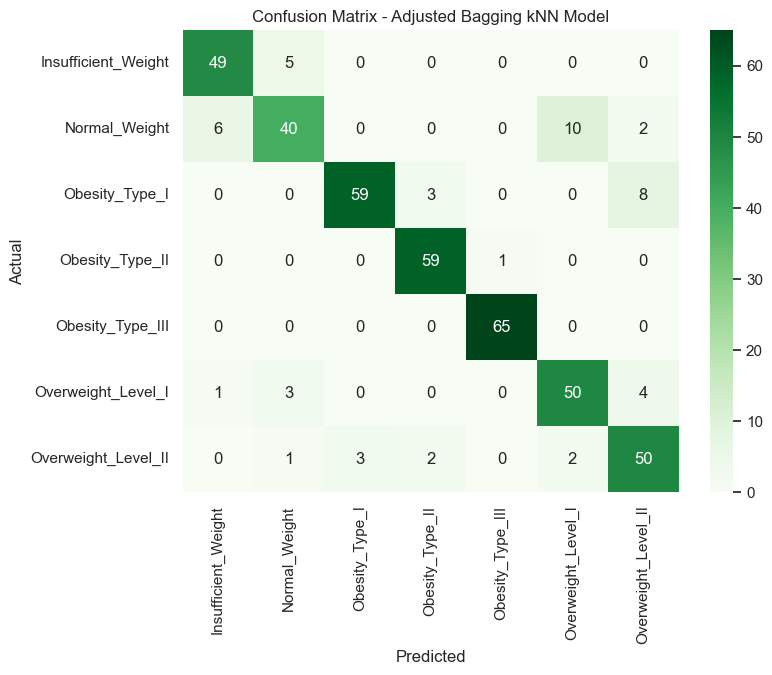

Adjusted Bagging kNN Model Accuracy: 0.88
Adjusted Bagging kNN Model F1 Score: 0.88
Adjusted Bagging kNN Model Precision: 0.88
Adjusted Bagging kNN Model Recall: 0.88


In [43]:
# **Confusion Matrix for Adjusted Bagging kNN Model**

cm_bagging_knn_adjusted = confusion_matrix(y_test, y_pred_bagging_knn_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bagging_knn_adjusted, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Adjusted Bagging kNN Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_bagging_knn_adjusted = accuracy_score(y_test, y_pred_bagging_knn_adjusted)
f1_bagging_knn_adjusted = f1_score(y_test, y_pred_bagging_knn_adjusted, average='weighted')
precision_bagging_knn_adjusted = precision_score(y_test, y_pred_bagging_knn_adjusted, average='weighted')
recall_bagging_knn_adjusted = recall_score(y_test, y_pred_bagging_knn_adjusted, average='weighted')

print(f"Adjusted Bagging kNN Model Accuracy: {accuracy_bagging_knn_adjusted:.2f}")
print(f"Adjusted Bagging kNN Model F1 Score: {f1_bagging_knn_adjusted:.2f}")
print(f"Adjusted Bagging kNN Model Precision: {precision_bagging_knn_adjusted:.2f}")
print(f"Adjusted Bagging kNN Model Recall: {recall_bagging_knn_adjusted:.2f}")


### Decision Tree

In [44]:
# **Training the Base Decision Tree Model**

# Initialize the base Decision Tree Classifier with default parameters
dt_base = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_base.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt_base = dt_base.predict(X_test)


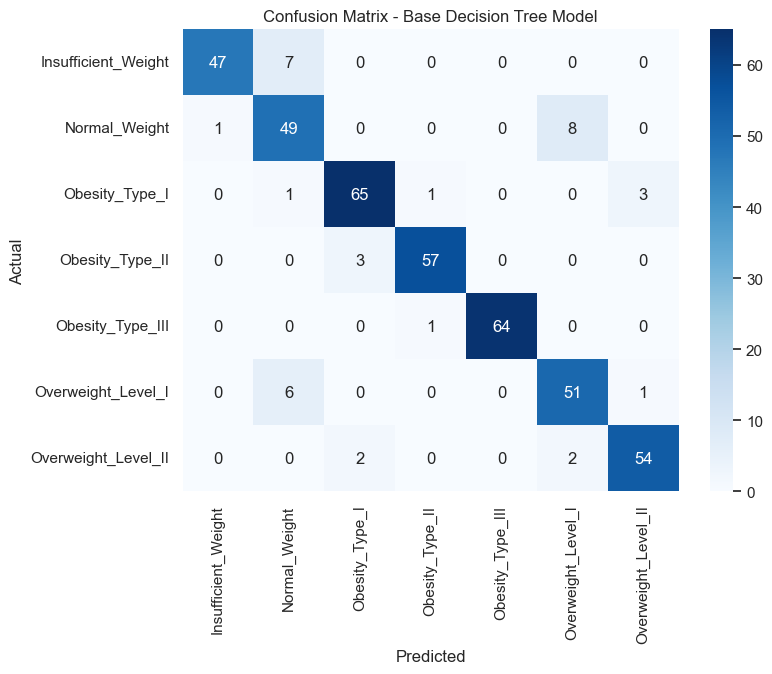

Base Decision Tree Model Accuracy: 0.91
Base Decision Tree Model F1 Score: 0.92
Base Decision Tree Model Precision: 0.92
Base Decision Tree Model Recall: 0.91


In [45]:
# **Confusion Matrix for Base Decision Tree Model**

cm_dt_base = confusion_matrix(y_test, y_pred_dt_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Base Decision Tree Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_dt_base = accuracy_score(y_test, y_pred_dt_base)
f1_dt_base = f1_score(y_test, y_pred_dt_base, average='weighted')
precision_dt_base = precision_score(y_test, y_pred_dt_base, average='weighted')
recall_dt_base = recall_score(y_test, y_pred_dt_base, average='weighted')

print(f"Base Decision Tree Model Accuracy: {accuracy_dt_base:.2f}")
print(f"Base Decision Tree Model F1 Score: {f1_dt_base:.2f}")
print(f"Base Decision Tree Model Precision: {precision_dt_base:.2f}")
print(f"Base Decision Tree Model Recall: {recall_dt_base:.2f}")


In [46]:
# **Training the Adjusted Decision Tree Model**

# Initialize the adjusted Decision Tree Classifier with tuned hyperparameters
dt_adjusted = DecisionTreeClassifier(
    max_depth=128,
    min_samples_split=100,
    min_samples_leaf=32,
    random_state=42
)

# Train the model on the training data
dt_adjusted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt_adjusted = dt_adjusted.predict(X_test)


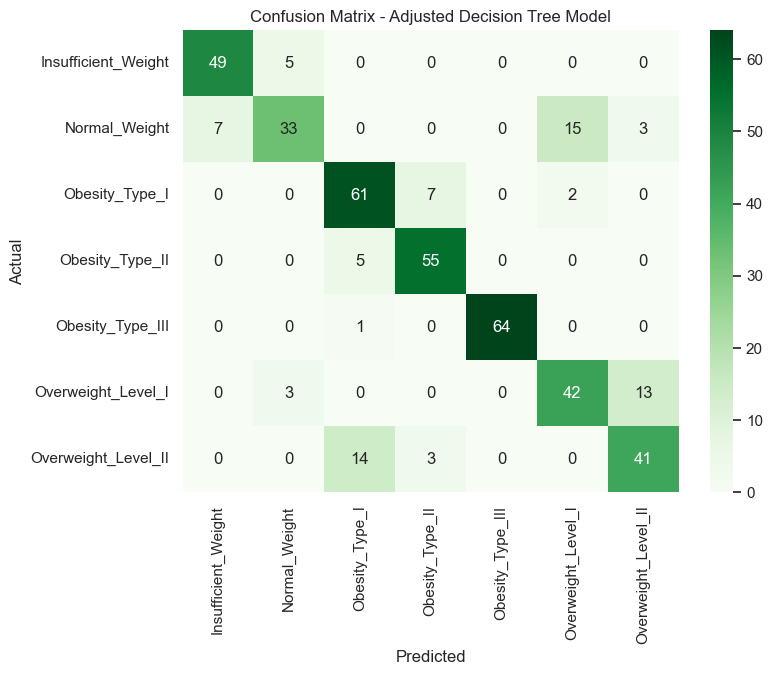

Adjusted Decision Tree Model Accuracy: 0.82
Adjusted Decision Tree Model F1 Score: 0.81
Adjusted Decision Tree Model Precision: 0.82
Adjusted Decision Tree Model Recall: 0.82


In [47]:
# **Confusion Matrix for Adjusted Decision Tree Model**

cm_dt_adjusted = confusion_matrix(y_test, y_pred_dt_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt_adjusted, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Adjusted Decision Tree Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_dt_adjusted = accuracy_score(y_test, y_pred_dt_adjusted)
f1_dt_adjusted = f1_score(y_test, y_pred_dt_adjusted, average='weighted')
precision_dt_adjusted = precision_score(y_test, y_pred_dt_adjusted, average='weighted')
recall_dt_adjusted = recall_score(y_test, y_pred_dt_adjusted, average='weighted')

print(f"Adjusted Decision Tree Model Accuracy: {accuracy_dt_adjusted:.2f}")
print(f"Adjusted Decision Tree Model F1 Score: {f1_dt_adjusted:.2f}")
print(f"Adjusted Decision Tree Model Precision: {precision_dt_adjusted:.2f}")
print(f"Adjusted Decision Tree Model Recall: {recall_dt_adjusted:.2f}")


### Random Forest

In [48]:
# **Training the Base Random Forest Model**

# Initialize the base Random Forest Classifier with default parameters
rf_base = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_base.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_base = rf_base.predict(X_test)


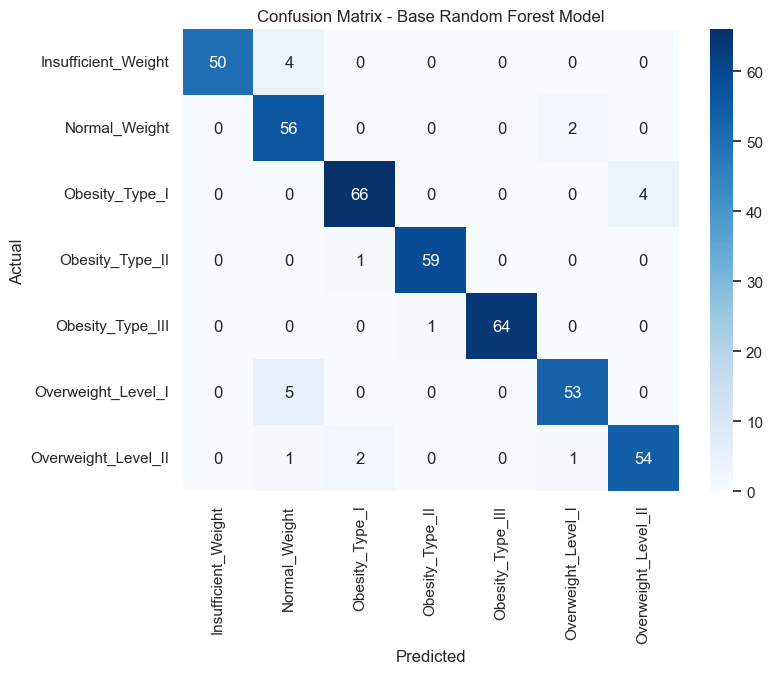

Base Random Forest Model Accuracy: 0.95
Base Random Forest Model F1 Score: 0.95
Base Random Forest Model Precision: 0.95
Base Random Forest Model Recall: 0.95


In [49]:
# **Confusion Matrix for Base Random Forest Model**

cm_rf_base = confusion_matrix(y_test, y_pred_rf_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Base Random Forest Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_rf_base = accuracy_score(y_test, y_pred_rf_base)
f1_rf_base = f1_score(y_test, y_pred_rf_base, average='weighted')
precision_rf_base = precision_score(y_test, y_pred_rf_base, average='weighted')
recall_rf_base = recall_score(y_test, y_pred_rf_base, average='weighted')

print(f"Base Random Forest Model Accuracy: {accuracy_rf_base:.2f}")
print(f"Base Random Forest Model F1 Score: {f1_rf_base:.2f}")
print(f"Base Random Forest Model Precision: {precision_rf_base:.2f}")
print(f"Base Random Forest Model Recall: {recall_rf_base:.2f}")


In [50]:
# **Training the Adjusted Random Forest Model**

# Initialize the adjusted Random Forest Classifier with tuned hyperparameters
rf_adjusted = RandomForestClassifier(
    n_estimators=2000,       # Increase the number of trees in the forest
    max_depth=512,           # Limit the depth of the trees
    min_samples_split=32,    # Minimum number of samples required to split an internal node
    min_samples_leaf=8,     # Minimum number of samples required to be at a leaf node
    random_state=42,
    n_jobs=-1               # Use all available cores
)

# Train the model on the training data
rf_adjusted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_adjusted = rf_adjusted.predict(X_test)


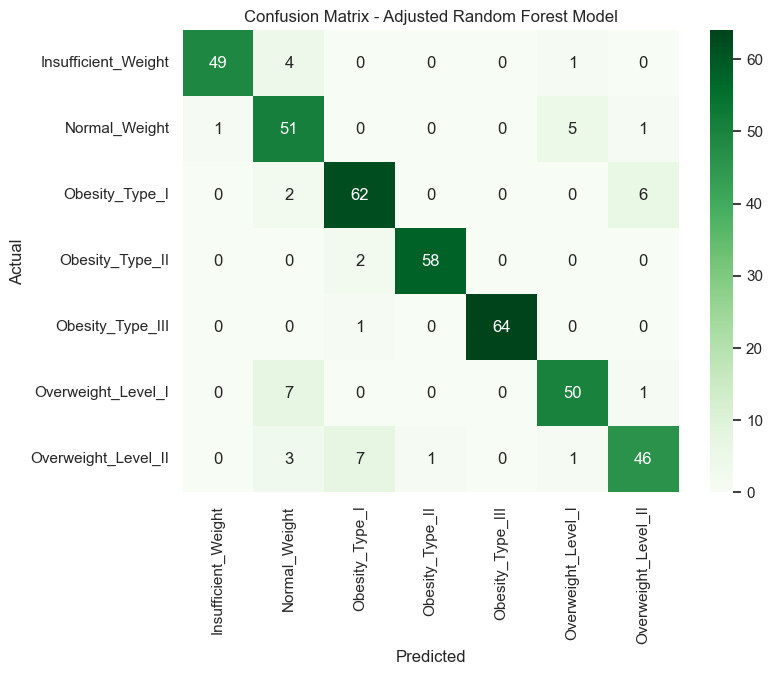

Adjusted Random Forest Model Accuracy: 0.90
Adjusted Random Forest Model F1 Score: 0.90
Adjusted Random Forest Model Precision: 0.90
Adjusted Random Forest Model Recall: 0.90


In [51]:
# **Confusion Matrix for Adjusted Random Forest Model**

cm_rf_adjusted = confusion_matrix(y_test, y_pred_rf_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf_adjusted, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Adjusted Random Forest Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_rf_adjusted = accuracy_score(y_test, y_pred_rf_adjusted)
f1_rf_adjusted = f1_score(y_test, y_pred_rf_adjusted, average='weighted')
precision_rf_adjusted = precision_score(y_test, y_pred_rf_adjusted, average='weighted')
recall_rf_adjusted = recall_score(y_test, y_pred_rf_adjusted, average='weighted')

print(f"Adjusted Random Forest Model Accuracy: {accuracy_rf_adjusted:.2f}")
print(f"Adjusted Random Forest Model F1 Score: {f1_rf_adjusted:.2f}")
print(f"Adjusted Random Forest Model Precision: {precision_rf_adjusted:.2f}")
print(f"Adjusted Random Forest Model Recall: {recall_rf_adjusted:.2f}")


Representation of how GridSearch (or RandomizedSearch - instead of all combinations, take some at random) may be utilized to find best paramaters. It is very useful for hyperparameter dependant algorithms like Random Forests. Note: This is just a dummy example, utilizng grid search is very compuationally heavy. Below is an example. 

In [52]:
# Define the parameter grid
param_grid = {
    'n_estimators': [300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)


Best Parameters from Grid Search:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


## Rule Based Models (Boosting)

### Adaptive Boosting (AdaBoost)

In [53]:
# **Training the Base AdaBoost Model**

# Initialize the base AdaBoost Classifier with default parameters
adaboost_base = AdaBoostClassifier(random_state=42)

# Train the model on the training data
adaboost_base.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost_base = adaboost_base.predict(X_test)


c:\Users\nikip\miniforge3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


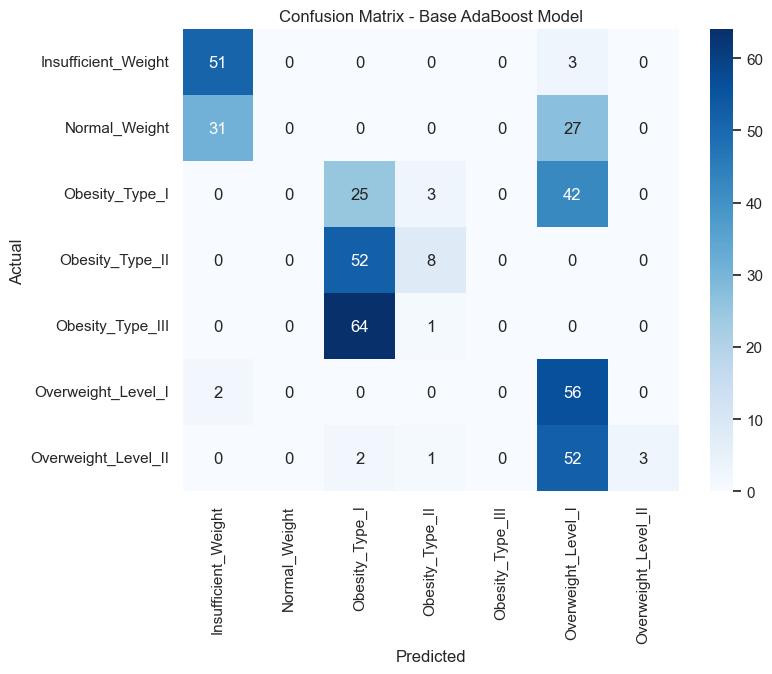

Base AdaBoost Model Accuracy: 0.34
Base AdaBoost Model F1 Score: 0.24
Base AdaBoost Model Precision: 0.37
Base AdaBoost Model Recall: 0.34


c:\Users\nikip\miniforge3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
# **Confusion Matrix for Base AdaBoost Model**

cm_adaboost_base = confusion_matrix(y_test, y_pred_adaboost_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm_adaboost_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Base AdaBoost Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_adaboost_base = accuracy_score(y_test, y_pred_adaboost_base)
f1_adaboost_base = f1_score(y_test, y_pred_adaboost_base, average='weighted')
precision_adaboost_base = precision_score(y_test, y_pred_adaboost_base, average='weighted')
recall_adaboost_base = recall_score(y_test, y_pred_adaboost_base, average='weighted')

print(f"Base AdaBoost Model Accuracy: {accuracy_adaboost_base:.2f}")
print(f"Base AdaBoost Model F1 Score: {f1_adaboost_base:.2f}")
print(f"Base AdaBoost Model Precision: {precision_adaboost_base:.2f}")
print(f"Base AdaBoost Model Recall: {recall_adaboost_base:.2f}")


In [55]:
# **Training the Adjusted AdaBoost Model**

# Initialize the base estimator with increased complexity
base_estimator = DecisionTreeClassifier(
    max_depth=3,       # Increase the depth of the tree
    min_samples_leaf=5,
    random_state=42
)

# Initialize the adjusted AdaBoost Classifier with tuned hyperparameters
adaboost_adjusted = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=1000,         # Increase the number of estimators
    learning_rate=0.001,        # Adjust the learning rate
    random_state=42
)

# Train the model on the training data
adaboost_adjusted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost_adjusted = adaboost_adjusted.predict(X_test)


c:\Users\nikip\miniforge3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


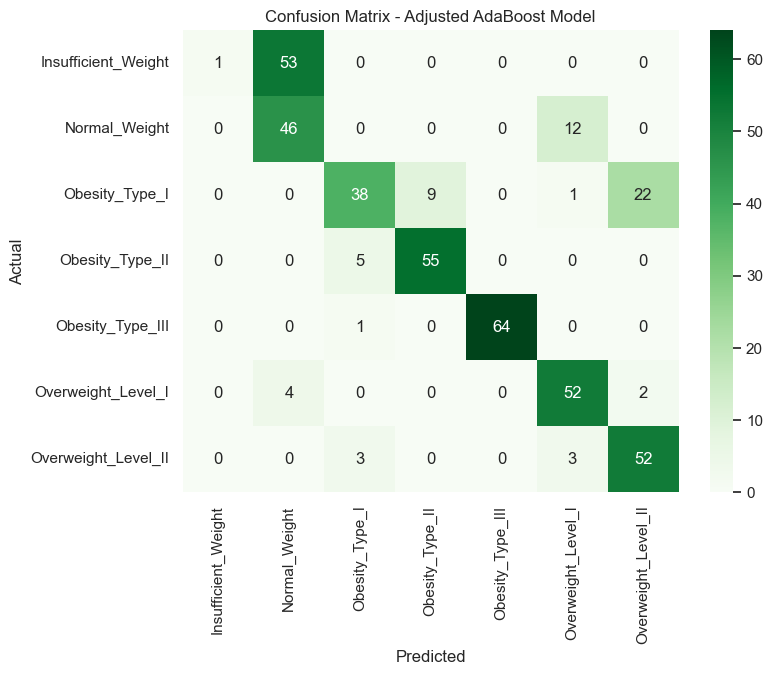

Adjusted AdaBoost Model Accuracy: 0.73
Adjusted AdaBoost Model F1 Score: 0.69
Adjusted AdaBoost Model Precision: 0.80
Adjusted AdaBoost Model Recall: 0.73


In [56]:
# **Confusion Matrix for Adjusted AdaBoost Model**

cm_adaboost_adjusted = confusion_matrix(y_test, y_pred_adaboost_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm_adaboost_adjusted, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Adjusted AdaBoost Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_adaboost_adjusted = accuracy_score(y_test, y_pred_adaboost_adjusted)
f1_adaboost_adjusted = f1_score(y_test, y_pred_adaboost_adjusted, average='weighted')
precision_adaboost_adjusted = precision_score(y_test, y_pred_adaboost_adjusted, average='weighted')
recall_adaboost_adjusted = recall_score(y_test, y_pred_adaboost_adjusted, average='weighted')

print(f"Adjusted AdaBoost Model Accuracy: {accuracy_adaboost_adjusted:.2f}")
print(f"Adjusted AdaBoost Model F1 Score: {f1_adaboost_adjusted:.2f}")
print(f"Adjusted AdaBoost Model Precision: {precision_adaboost_adjusted:.2f}")
print(f"Adjusted AdaBoost Model Recall: {recall_adaboost_adjusted:.2f}")


### Gradient Boost (GradBoost)

In [57]:
# **Training the Base Gradient Boosting Model**

# Initialize the base Gradient Boosting Classifier with default parameters
gb_base = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_base.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb_base = gb_base.predict(X_test)


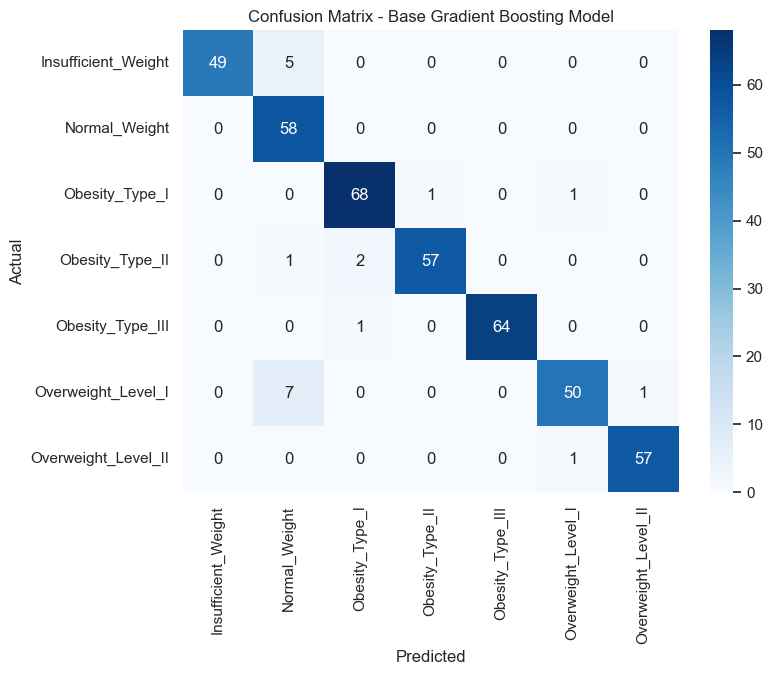

Base Gradient Boosting Model Accuracy: 0.95
Base Gradient Boosting Model F1 Score: 0.95
Base Gradient Boosting Model Precision: 0.96
Base Gradient Boosting Model Recall: 0.95


In [58]:
# **Confusion Matrix for Base Gradient Boosting Model**

cm_gb_base = confusion_matrix(y_test, y_pred_gb_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm_gb_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Base Gradient Boosting Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_gb_base = accuracy_score(y_test, y_pred_gb_base)
f1_gb_base = f1_score(y_test, y_pred_gb_base, average='weighted')
precision_gb_base = precision_score(y_test, y_pred_gb_base, average='weighted')
recall_gb_base = recall_score(y_test, y_pred_gb_base, average='weighted')

print(f"Base Gradient Boosting Model Accuracy: {accuracy_gb_base:.2f}")
print(f"Base Gradient Boosting Model F1 Score: {f1_gb_base:.2f}")
print(f"Base Gradient Boosting Model Precision: {precision_gb_base:.2f}")
print(f"Base Gradient Boosting Model Recall: {recall_gb_base:.2f}")


In [59]:
# **Training the Adjusted Gradient Boosting Model**

# Initialize the adjusted Gradient Boosting Classifier with tuned hyperparameters
gb_adjusted = GradientBoostingClassifier(
    n_estimators=1000,        # Increase the number of trees
    learning_rate=0.01,      # Reduce learning rate
    max_depth=32,             # Limit the depth of the trees
    subsample=0.8,           # Use 80% of samples for each tree
    random_state=42
)

# Train the model on the training data
gb_adjusted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb_adjusted = gb_adjusted.predict(X_test)


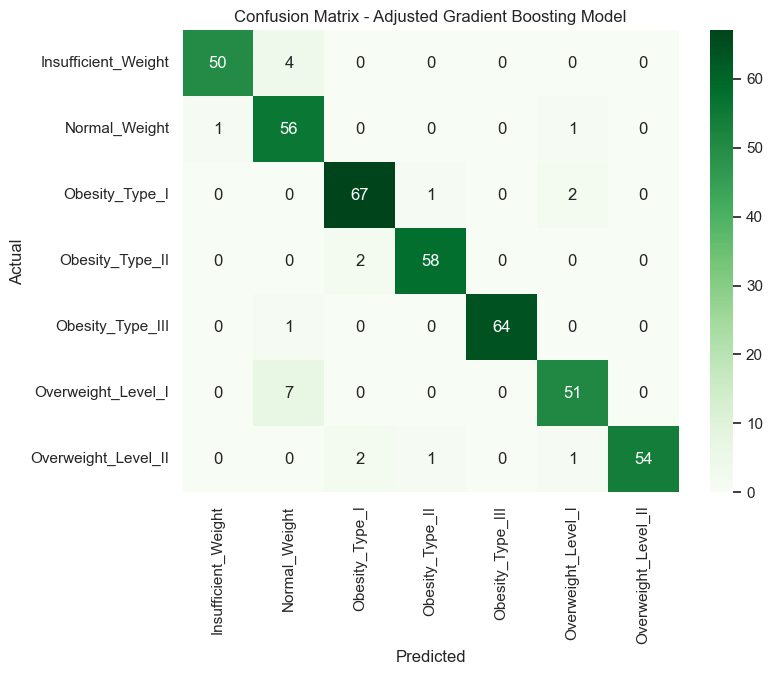

Adjusted Gradient Boosting Model Accuracy: 0.95
Adjusted Gradient Boosting Model F1 Score: 0.95
Adjusted Gradient Boosting Model Precision: 0.95
Adjusted Gradient Boosting Model Recall: 0.95


In [60]:
# **Confusion Matrix for Adjusted Gradient Boosting Model**

cm_gb_adjusted = confusion_matrix(y_test, y_pred_gb_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm_gb_adjusted, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Adjusted Gradient Boosting Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_gb_adjusted = accuracy_score(y_test, y_pred_gb_adjusted)
f1_gb_adjusted = f1_score(y_test, y_pred_gb_adjusted, average='weighted')
precision_gb_adjusted = precision_score(y_test, y_pred_gb_adjusted, average='weighted')
recall_gb_adjusted = recall_score(y_test, y_pred_gb_adjusted, average='weighted')

print(f"Adjusted Gradient Boosting Model Accuracy: {accuracy_gb_adjusted:.2f}")
print(f"Adjusted Gradient Boosting Model F1 Score: {f1_gb_adjusted:.2f}")
print(f"Adjusted Gradient Boosting Model Precision: {precision_gb_adjusted:.2f}")
print(f"Adjusted Gradient Boosting Model Recall: {recall_gb_adjusted:.2f}")


### Extreme Gradient Boosting (XGB)

In [61]:
# **Training the Base XGBoost Model**

# Initialize the base XGBoost Classifier with default parameters
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model on the training data
xgb_base.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb_base = xgb_base.predict(X_test)


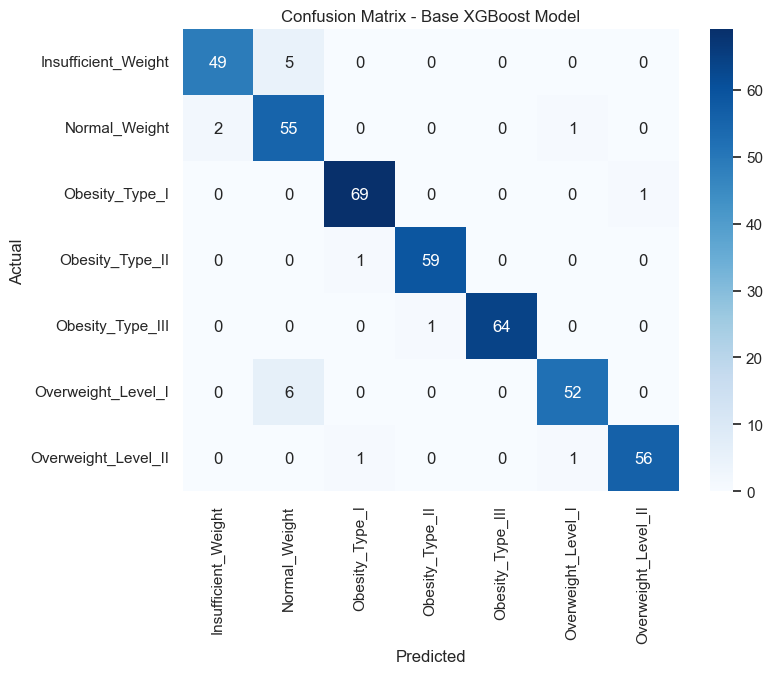

Base XGBoost Model Accuracy: 0.96
Base XGBoost Model F1 Score: 0.96
Base XGBoost Model Precision: 0.96
Base XGBoost Model Recall: 0.96


In [62]:
# **Confusion Matrix for Base XGBoost Model**

cm_xgb_base = confusion_matrix(y_test, y_pred_xgb_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Base XGBoost Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_xgb_base = accuracy_score(y_test, y_pred_xgb_base)
f1_xgb_base = f1_score(y_test, y_pred_xgb_base, average='weighted')
precision_xgb_base = precision_score(y_test, y_pred_xgb_base, average='weighted')
recall_xgb_base = recall_score(y_test, y_pred_xgb_base, average='weighted')

print(f"Base XGBoost Model Accuracy: {accuracy_xgb_base:.2f}")
print(f"Base XGBoost Model F1 Score: {f1_xgb_base:.2f}")
print(f"Base XGBoost Model Precision: {precision_xgb_base:.2f}")
print(f"Base XGBoost Model Recall: {recall_xgb_base:.2f}")


In [63]:
# **Training the Adjusted XGBoost Model**

# Initialize the adjusted XGBoost Classifier with tuned hyperparameters
xgb_adjusted = XGBClassifier(
    n_estimators=2000,
    learning_rate=0.01,
    max_depth=32,
    subsample=0.8,
    colsample_bytree=0.1,
    use_label_encoder=True,
    random_state=42
)

# Define evaluation set for early stopping
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the model on the training data with early stopping
xgb_adjusted.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    verbose=False
)

# Make predictions on the test set
y_pred_xgb_adjusted = xgb_adjusted.predict(X_test)


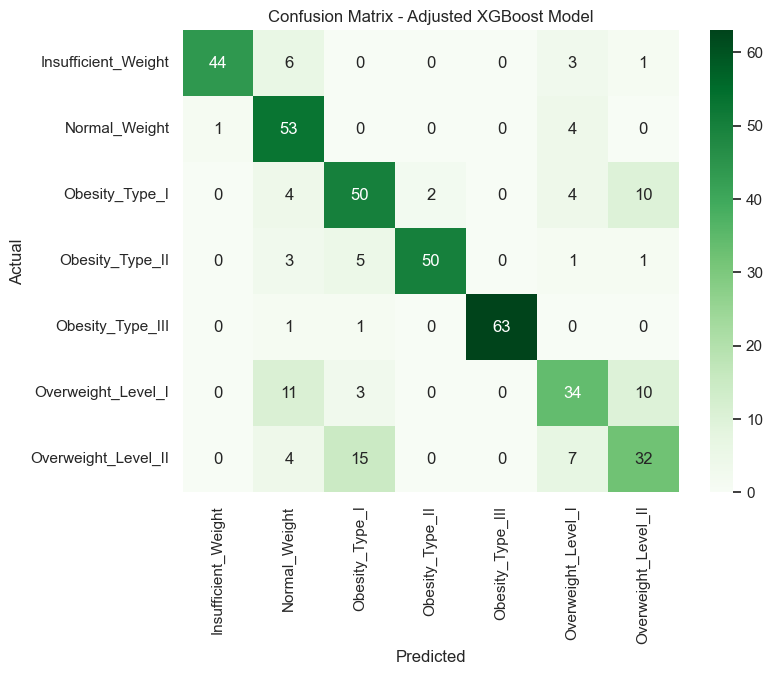

Adjusted XGBoost Model Accuracy: 0.77
Adjusted XGBoost Model F1 Score: 0.77
Adjusted XGBoost Model Precision: 0.78
Adjusted XGBoost Model Recall: 0.77


In [64]:
# **Confusion Matrix for Adjusted XGBoost Model**

cm_xgb_adjusted = confusion_matrix(y_test, y_pred_xgb_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb_adjusted, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Adjusted XGBoost Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_xgb_adjusted = accuracy_score(y_test, y_pred_xgb_adjusted)
f1_xgb_adjusted = f1_score(y_test, y_pred_xgb_adjusted, average='weighted')
precision_xgb_adjusted = precision_score(y_test, y_pred_xgb_adjusted, average='weighted')
recall_xgb_adjusted = recall_score(y_test, y_pred_xgb_adjusted, average='weighted')

print(f"Adjusted XGBoost Model Accuracy: {accuracy_xgb_adjusted:.2f}")
print(f"Adjusted XGBoost Model F1 Score: {f1_xgb_adjusted:.2f}")
print(f"Adjusted XGBoost Model Precision: {precision_xgb_adjusted:.2f}")
print(f"Adjusted XGBoost Model Recall: {recall_xgb_adjusted:.2f}")


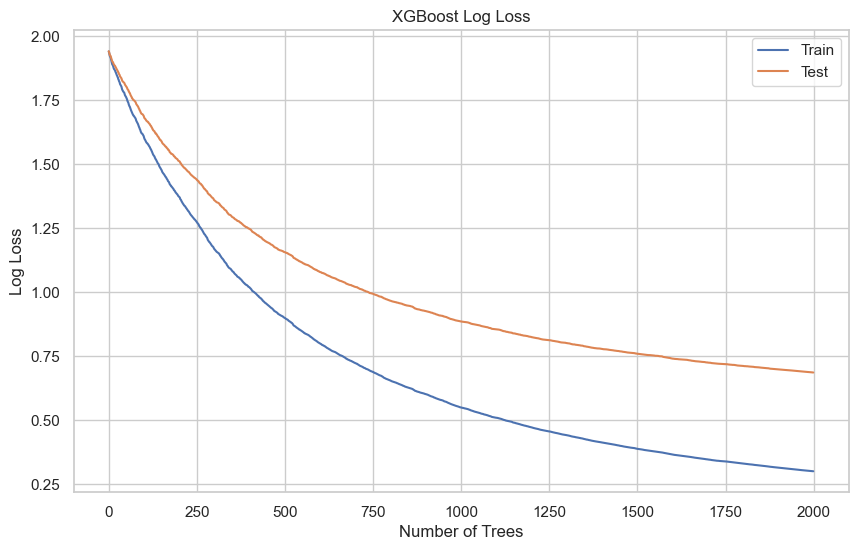

In [65]:
# Access evaluation results
evals_result = xgb_adjusted.evals_result()

# Plot training and validation error
epochs = len(evals_result['validation_0']['mlogloss'])
x_axis = range(0, epochs)
plt.figure(figsize=(10,6))
plt.plot(x_axis, evals_result['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, evals_result['validation_1']['mlogloss'], label='Test')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.legend()
plt.show()


## HypePlane Classifiers

HyperPlane models are sensitive to feature scaling. We'll scale the features using `StandardScaler`.

### Support Vector Machines (SVM)

In [66]:
# **Scaling Features**

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [67]:
# **Training the Base SVM Model**

# Initialize the base SVM Classifier with default parameters
svm_base = SVC()

# Train the model on the scaled training data
svm_base.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm_base = svm_base.predict(X_test_scaled)


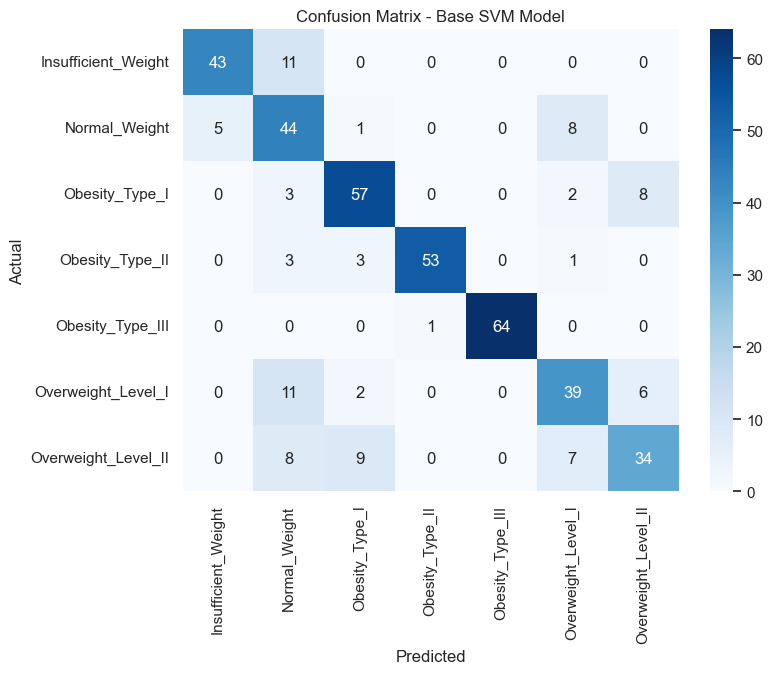

Base SVM Model Accuracy: 0.79
Base SVM Model F1 Score: 0.79
Base SVM Model Precision: 0.80
Base SVM Model Recall: 0.79


In [68]:
# **Confusion Matrix for Base SVM Model**

cm_svm_base = confusion_matrix(y_test, y_pred_svm_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Base SVM Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_svm_base = accuracy_score(y_test, y_pred_svm_base)
f1_svm_base = f1_score(y_test, y_pred_svm_base, average='weighted')
precision_svm_base = precision_score(y_test, y_pred_svm_base, average='weighted')
recall_svm_base = recall_score(y_test, y_pred_svm_base, average='weighted')

print(f"Base SVM Model Accuracy: {accuracy_svm_base:.2f}")
print(f"Base SVM Model F1 Score: {f1_svm_base:.2f}")
print(f"Base SVM Model Precision: {precision_svm_base:.2f}")
print(f"Base SVM Model Recall: {recall_svm_base:.2f}")


In [69]:
# **Training the Adjusted SVM Model**

# Initialize the adjusted SVM Classifier with tuned hyperparameters
svm_adjusted = SVC(
    kernel='rbf',
    C=1.0,              # Regularization parameter
    gamma='scale',      # Kernel coefficient
    probability=False,
    random_state=42
)

# Train the model on the scaled training data
svm_adjusted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm_adjusted = svm_adjusted.predict(X_test)


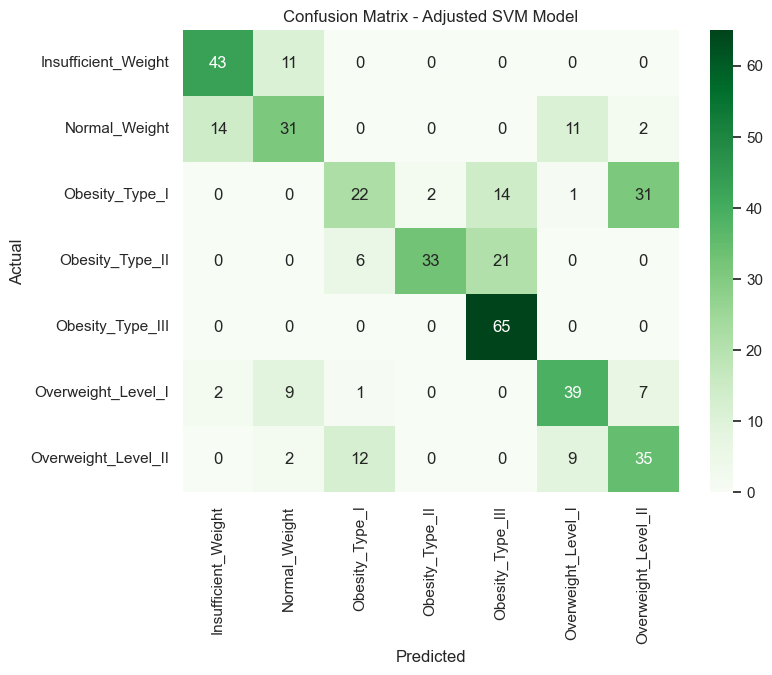

Adjusted SVM Model Accuracy: 0.63
Adjusted SVM Model F1 Score: 0.62
Adjusted SVM Model Precision: 0.65
Adjusted SVM Model Recall: 0.63


In [70]:
# **Confusion Matrix for Adjusted SVM Model**

cm_svm_adjusted = confusion_matrix(y_test, y_pred_svm_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm_adjusted, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Adjusted SVM Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_svm_adjusted = accuracy_score(y_test, y_pred_svm_adjusted)
f1_svm_adjusted = f1_score(y_test, y_pred_svm_adjusted, average='weighted')
precision_svm_adjusted = precision_score(y_test, y_pred_svm_adjusted, average='weighted')
recall_svm_adjusted = recall_score(y_test, y_pred_svm_adjusted, average='weighted')

print(f"Adjusted SVM Model Accuracy: {accuracy_svm_adjusted:.2f}")
print(f"Adjusted SVM Model F1 Score: {f1_svm_adjusted:.2f}")
print(f"Adjusted SVM Model Precision: {precision_svm_adjusted:.2f}")
print(f"Adjusted SVM Model Recall: {recall_svm_adjusted:.2f}")


### 1957 Perceptron

In [71]:
# **Training the Base Perceptron Model**

# Initialize the base Perceptron classifier with default parameters
perceptron_base = Perceptron(random_state=42)

# Train the model on the training data
perceptron_base.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_perceptron_base = perceptron_base.predict(X_test_scaled)


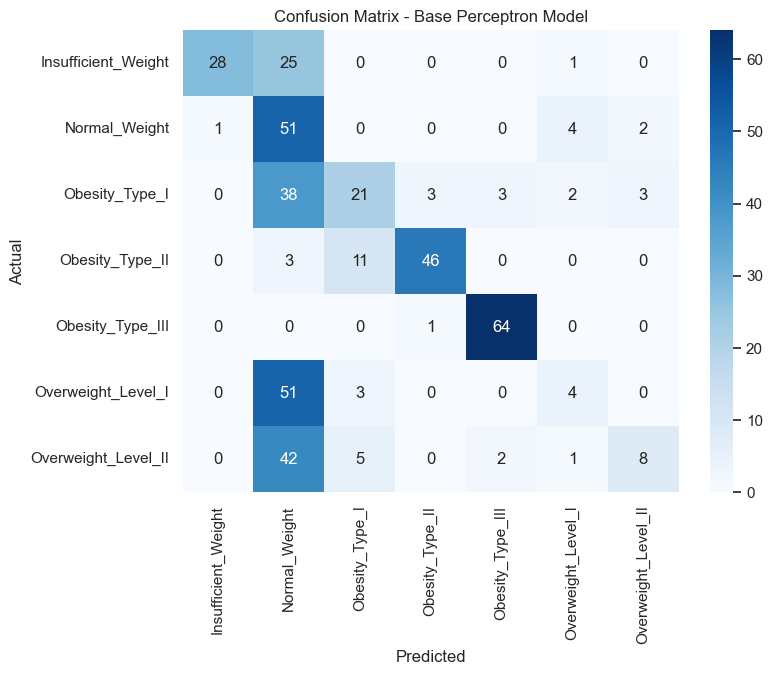

Base Perceptron Model Accuracy: 0.52
Base Perceptron Model F1 Score: 0.51
Base Perceptron Model Precision: 0.65
Base Perceptron Model Recall: 0.52


In [72]:
# **Confusion Matrix for Base Perceptron Model**

cm_perceptron_base = confusion_matrix(y_test, y_pred_perceptron_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm_perceptron_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Base Perceptron Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_perceptron_base = accuracy_score(y_test, y_pred_perceptron_base)
f1_perceptron_base = f1_score(y_test, y_pred_perceptron_base, average='weighted')
precision_perceptron_base = precision_score(y_test, y_pred_perceptron_base, average='weighted')
recall_perceptron_base = recall_score(y_test, y_pred_perceptron_base, average='weighted')

print(f"Base Perceptron Model Accuracy: {accuracy_perceptron_base:.2f}")
print(f"Base Perceptron Model F1 Score: {f1_perceptron_base:.2f}")
print(f"Base Perceptron Model Precision: {precision_perceptron_base:.2f}")
print(f"Base Perceptron Model Recall: {recall_perceptron_base:.2f}")


In [73]:
# **Training the Adjusted Perceptron Model**

# Initialize the adjusted Perceptron classifier with tuned hyperparameters
perceptron_adjusted = Perceptron(
    penalty='l2',
    alpha=0.0001,
    max_iter=1000,
    tol=1e-4,
    random_state=42
)

# Train the model on the training data
perceptron_adjusted.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_perceptron_adjusted = perceptron_adjusted.predict(X_test_scaled)


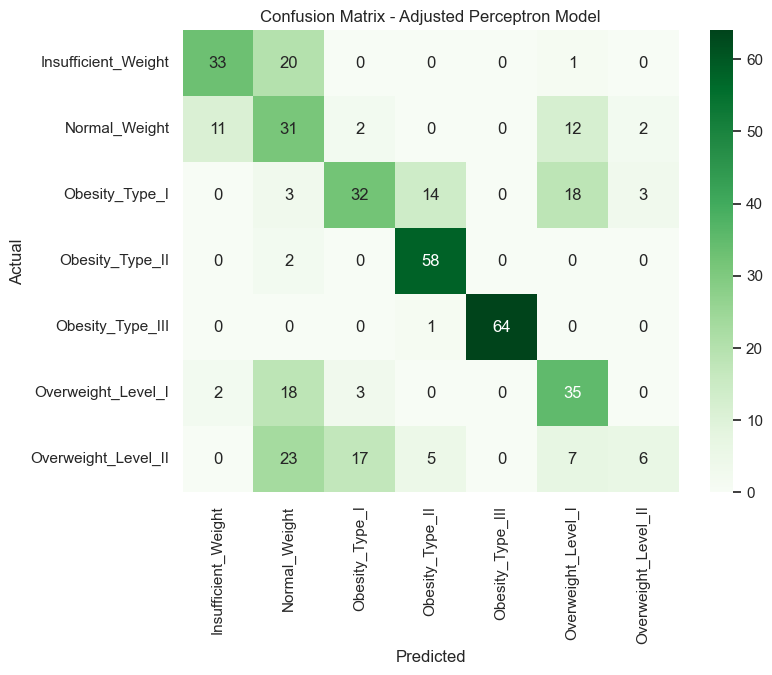

Adjusted Perceptron Model Accuracy: 0.61
Adjusted Perceptron Model F1 Score: 0.59
Adjusted Perceptron Model Precision: 0.63
Adjusted Perceptron Model Recall: 0.61


In [74]:
# **Confusion Matrix for Adjusted Perceptron Model**

cm_perceptron_adjusted = confusion_matrix(y_test, y_pred_perceptron_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm_perceptron_adjusted, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Adjusted Perceptron Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_perceptron_adjusted = accuracy_score(y_test, y_pred_perceptron_adjusted)
f1_perceptron_adjusted = f1_score(y_test, y_pred_perceptron_adjusted, average='weighted')
precision_perceptron_adjusted = precision_score(y_test, y_pred_perceptron_adjusted, average='weighted')
recall_perceptron_adjusted = recall_score(y_test, y_pred_perceptron_adjusted, average='weighted')

print(f"Adjusted Perceptron Model Accuracy: {accuracy_perceptron_adjusted:.2f}")
print(f"Adjusted Perceptron Model F1 Score: {f1_perceptron_adjusted:.2f}")
print(f"Adjusted Perceptron Model Precision: {precision_perceptron_adjusted:.2f}")
print(f"Adjusted Perceptron Model Recall: {recall_perceptron_adjusted:.2f}")


### Multi Layer Perceptron - Fully Connected Network

In [75]:
# **Training the Base MLP Model**

# Initialize the base MLP Classifier with default parameters
mlp_base = MLPClassifier(random_state=42, max_iter=200)

# Train the model on the scaled training data
mlp_base.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_mlp_base = mlp_base.predict(X_test_scaled)


c:\Users\nikip\miniforge3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


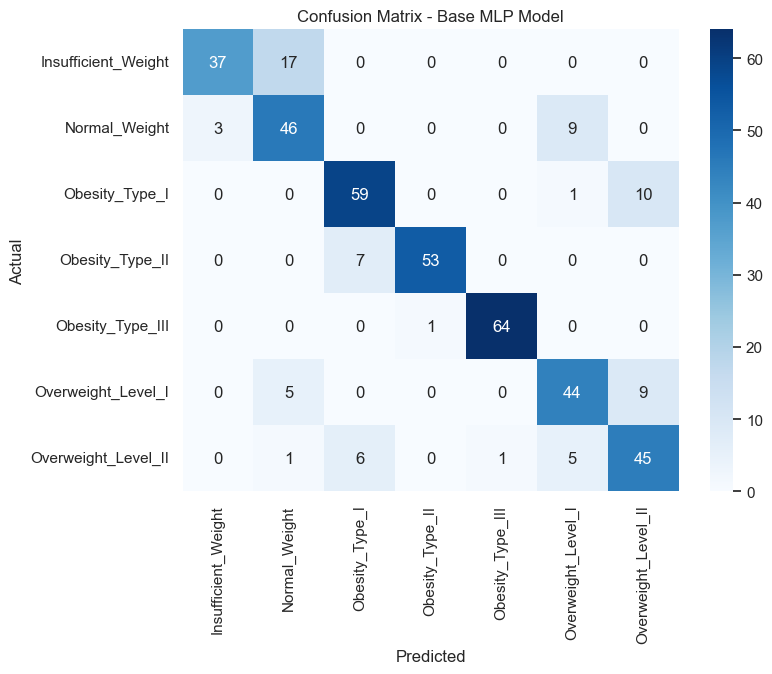

Base MLP Model Accuracy: 0.82
Base MLP Model F1 Score: 0.82
Base MLP Model Precision: 0.83
Base MLP Model Recall: 0.82


In [76]:
# **Confusion Matrix for Base MLP Model**

cm_mlp_base = confusion_matrix(y_test, y_pred_mlp_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm_mlp_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Base MLP Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_mlp_base = accuracy_score(y_test, y_pred_mlp_base)
f1_mlp_base = f1_score(y_test, y_pred_mlp_base, average='weighted')
precision_mlp_base = precision_score(y_test, y_pred_mlp_base, average='weighted')
recall_mlp_base = recall_score(y_test, y_pred_mlp_base, average='weighted')

print(f"Base MLP Model Accuracy: {accuracy_mlp_base:.2f}")
print(f"Base MLP Model F1 Score: {f1_mlp_base:.2f}")
print(f"Base MLP Model Precision: {precision_mlp_base:.2f}")
print(f"Base MLP Model Recall: {recall_mlp_base:.2f}")


In [77]:
# **Training the Adjusted MLP Model**

# Initialize the adjusted MLP Classifier with tuned hyperparameters
mlp_adjusted = MLPClassifier(
    hidden_layer_sizes=(512, 256, 128, 64),
    activation='relu',
    solver='sgd',
    alpha=0.0001,
    learning_rate='adaptive',
    max_iter=1000,
    random_state=42
)

# Train the model on the scaled training data
mlp_adjusted.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_mlp_adjusted = mlp_adjusted.predict(X_test_scaled)


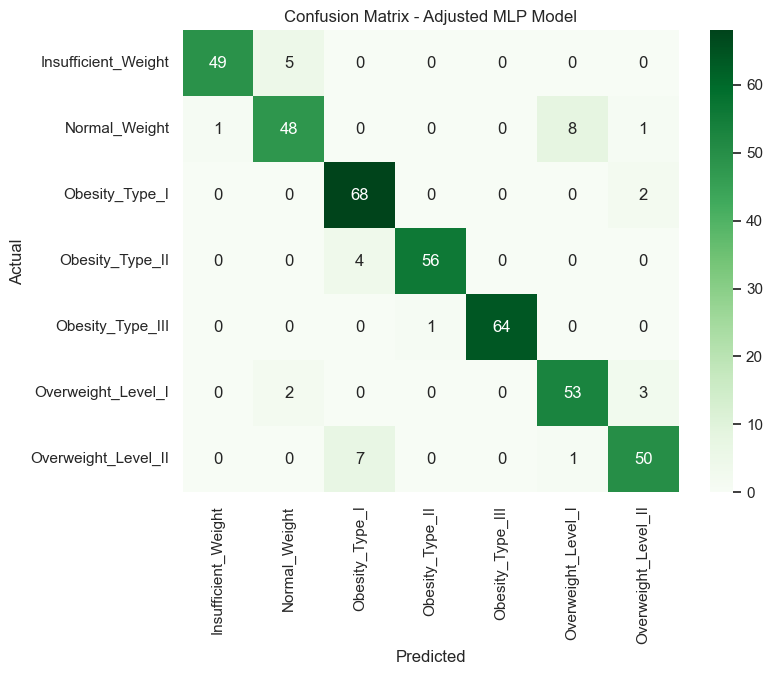

Adjusted MLP Model Accuracy: 0.92
Adjusted MLP Model F1 Score: 0.92
Adjusted MLP Model Precision: 0.92
Adjusted MLP Model Recall: 0.92


In [78]:
# **Confusion Matrix for Adjusted MLP Model**

cm_mlp_adjusted = confusion_matrix(y_test, y_pred_mlp_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm_mlp_adjusted, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Adjusted MLP Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Accuracy, F1 Score, Precision, and Recall**

accuracy_mlp_adjusted = accuracy_score(y_test, y_pred_mlp_adjusted)
f1_mlp_adjusted = f1_score(y_test, y_pred_mlp_adjusted, average='weighted')
precision_mlp_adjusted = precision_score(y_test, y_pred_mlp_adjusted, average='weighted')
recall_mlp_adjusted = recall_score(y_test, y_pred_mlp_adjusted, average='weighted')

print(f"Adjusted MLP Model Accuracy: {accuracy_mlp_adjusted:.2f}")
print(f"Adjusted MLP Model F1 Score: {f1_mlp_adjusted:.2f}")
print(f"Adjusted MLP Model Precision: {precision_mlp_adjusted:.2f}")
print(f"Adjusted MLP Model Recall: {recall_mlp_adjusted:.2f}")


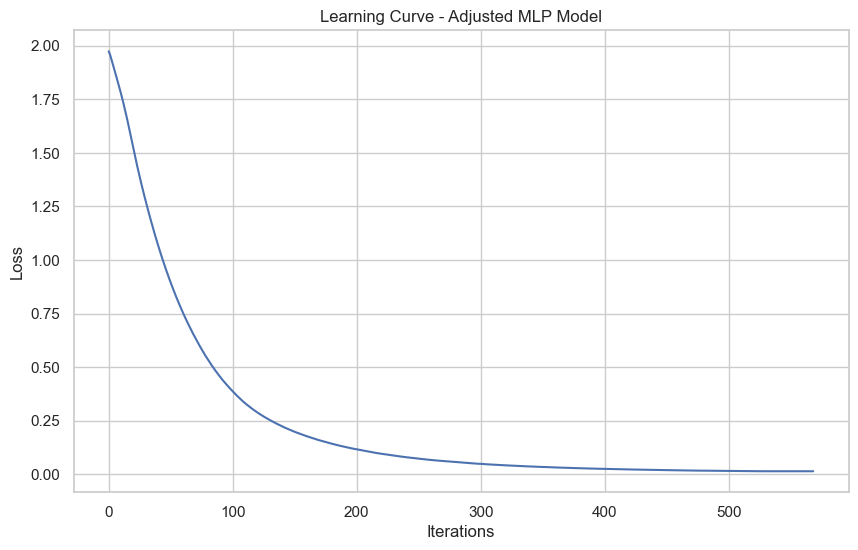

In [79]:
# **Plotting Learning Curves for Adjusted MLP Model**

plt.figure(figsize=(10,6))
plt.plot(mlp_adjusted.loss_curve_)
plt.title('Learning Curve - Adjusted MLP Model')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


## Feature Analysis - Rule Based Models

Models like decision trees, random forests, and gradient boosting machines provide the feature_importances_ attribute because they inherently calculate the importance of each feature during the training process by measuring how much each feature contributes to reducing impurity or error when splitting the data. This direct assessment allows them to quantify feature importance as part of their algorithm. In contrast, models like k-Nearest Neighbors, Naive Bayes, Support Vector Machines, and neural networks do not compute feature importance during training because they do not rely on feature splits or weights in a way that directly measures importance; instead, they make predictions based on distances, probabilities, or complex transformations, which do not yield straightforward feature importance scores. Therefore, these models lack the feature_importances_ attribute, and alternative methods like permutation importance are used to evaluate feature importance for them.

In [80]:

# Create a DataFrame to hold feature importances
feature_importances_df_rules = pd.DataFrame({'Feature': X.columns})

# Extract feature importances from each model
# Decision Tree
feature_importances_df_rules['Decision Tree'] = dt_adjusted.feature_importances_

# Random Forest
feature_importances_df_rules['Random Forest'] = rf_adjusted.feature_importances_

# AdaBoost
feature_importances_df_rules['AdaBoost'] = adaboost_adjusted.feature_importances_

# Gradient Boosting
feature_importances_df_rules['Gradient Boosting'] = gb_adjusted.feature_importances_

# XGBoost
feature_importances_df_rules['XGBoost'] = xgb_adjusted.feature_importances_

# Set the 'Feature' column as the index
feature_importances_df_rules.set_index('Feature', inplace=True)

# Display the DataFrame
feature_importances_df_rules.head()


Decision Tree  Random Forest  AdaBoost  \
Feature                                                                  
Gender                               0.204517       0.073671  0.055125   
Age                                  0.042688       0.083826  0.005844   
Height                               0.223120       0.078207  0.233381   
Weight                               0.499531       0.399992  0.548281   
family_history_with_overweight       0.000000       0.036454  0.000000   

                                Gradient Boosting   XGBoost  
Feature                                                      
Gender                                   0.069295  0.255037  
Age                                      0.053508  0.024032  
Height                                   0.164384  0.015093  
Weight                                   0.462252  0.084252  
family_history_with_overweight           0.003897  0.193302

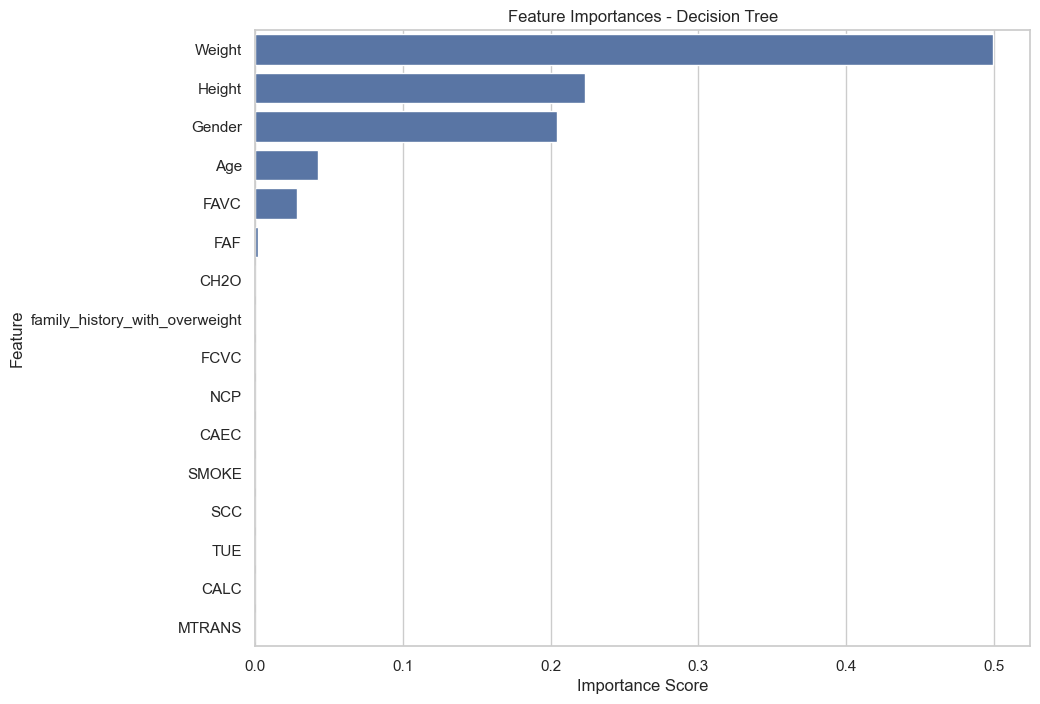

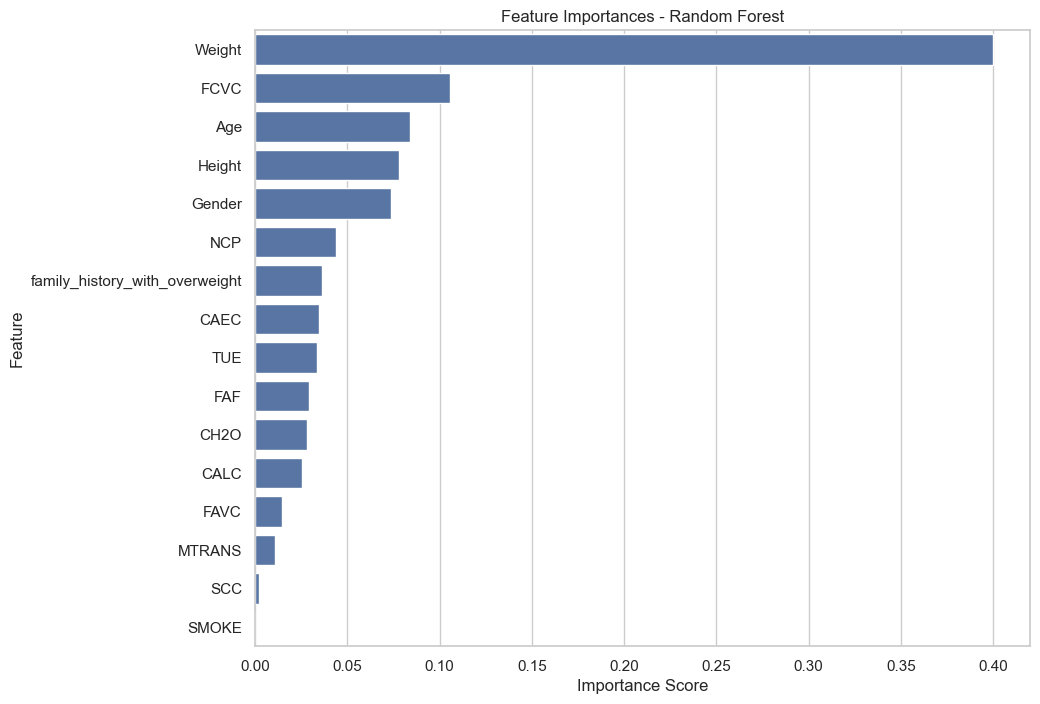

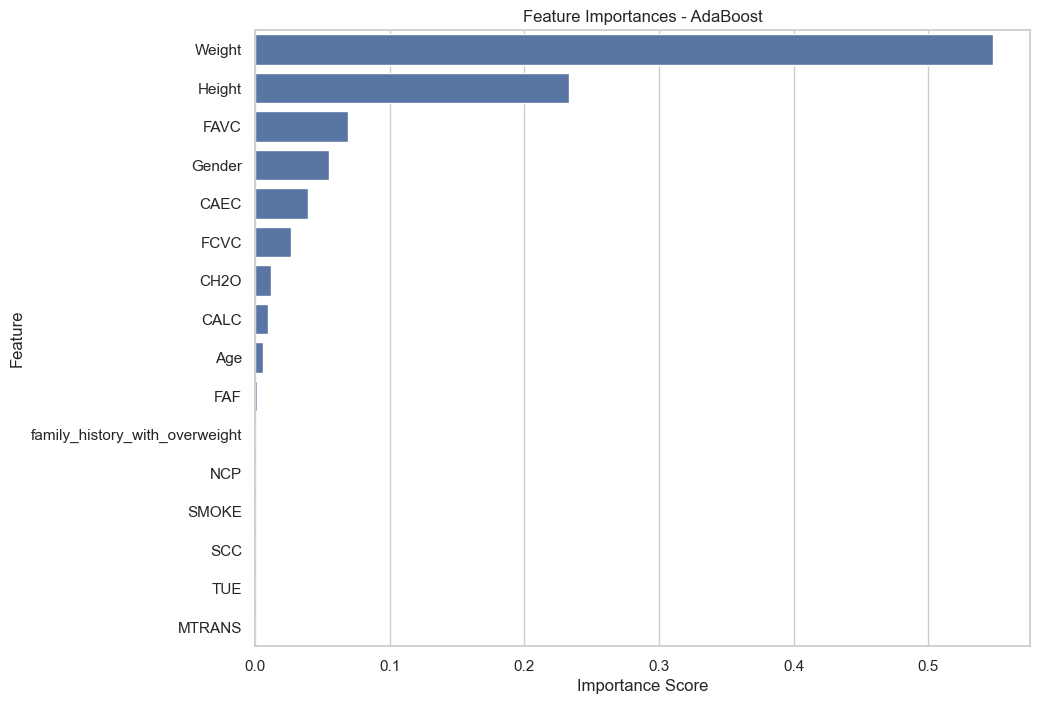

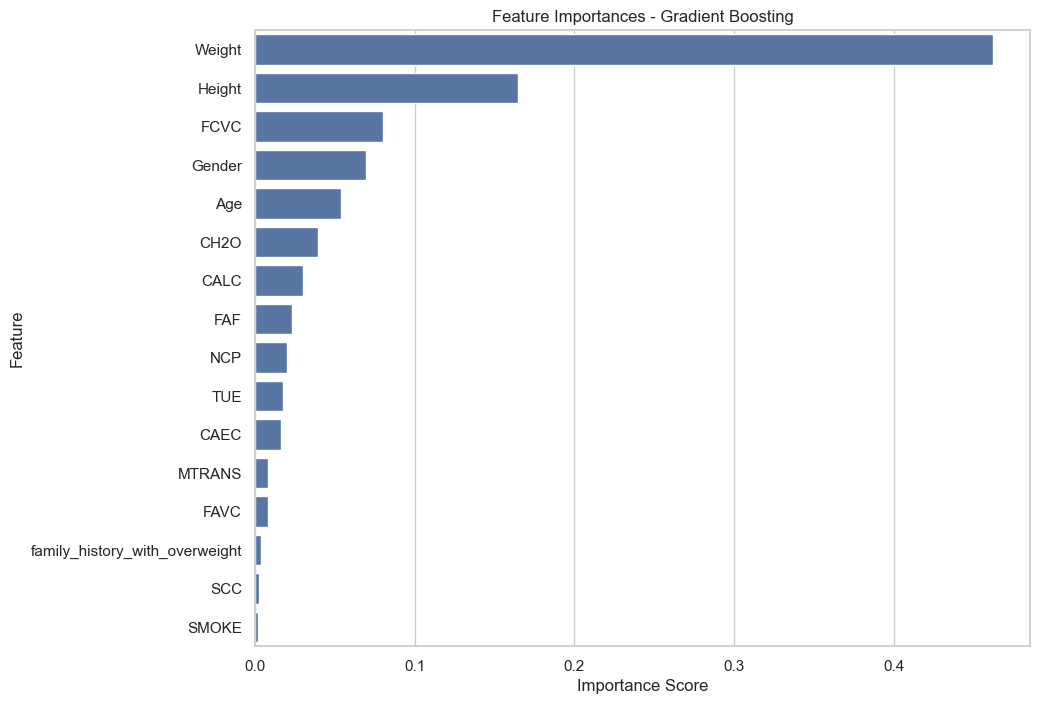

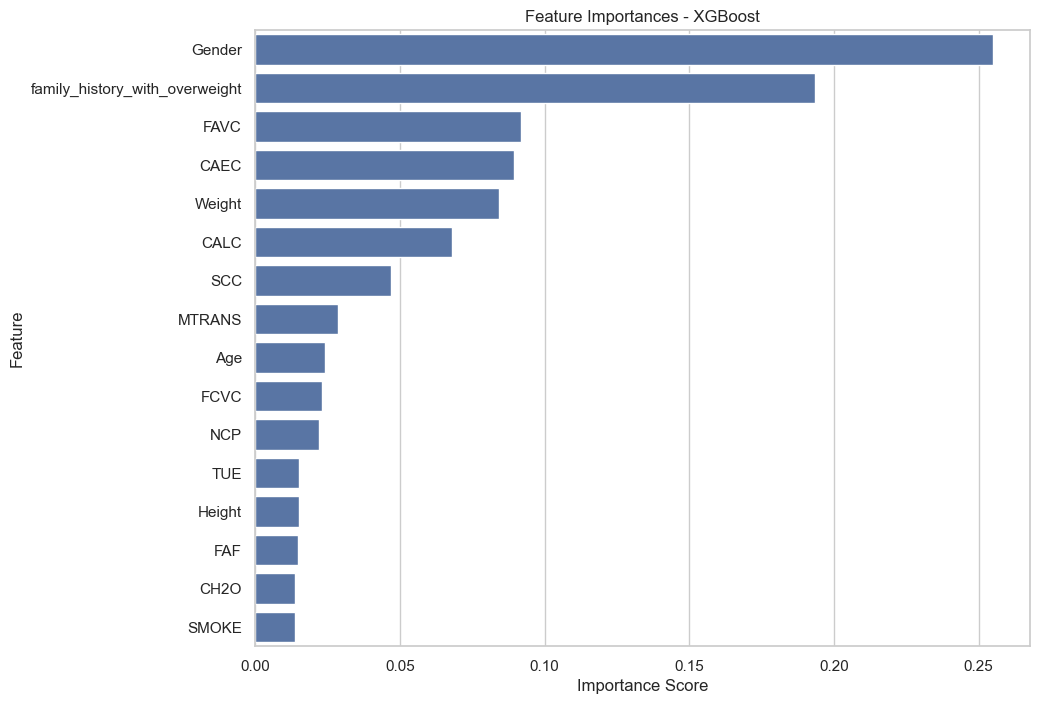

In [81]:
# **Bar Plots of Feature Importances**

models = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']

for model in models:
    # Sort features by importance
    fi = feature_importances_df_rules[model].sort_values(ascending=False)
    
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi.values, y=fi.index)
    plt.title(f'Feature Importances - {model}')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()


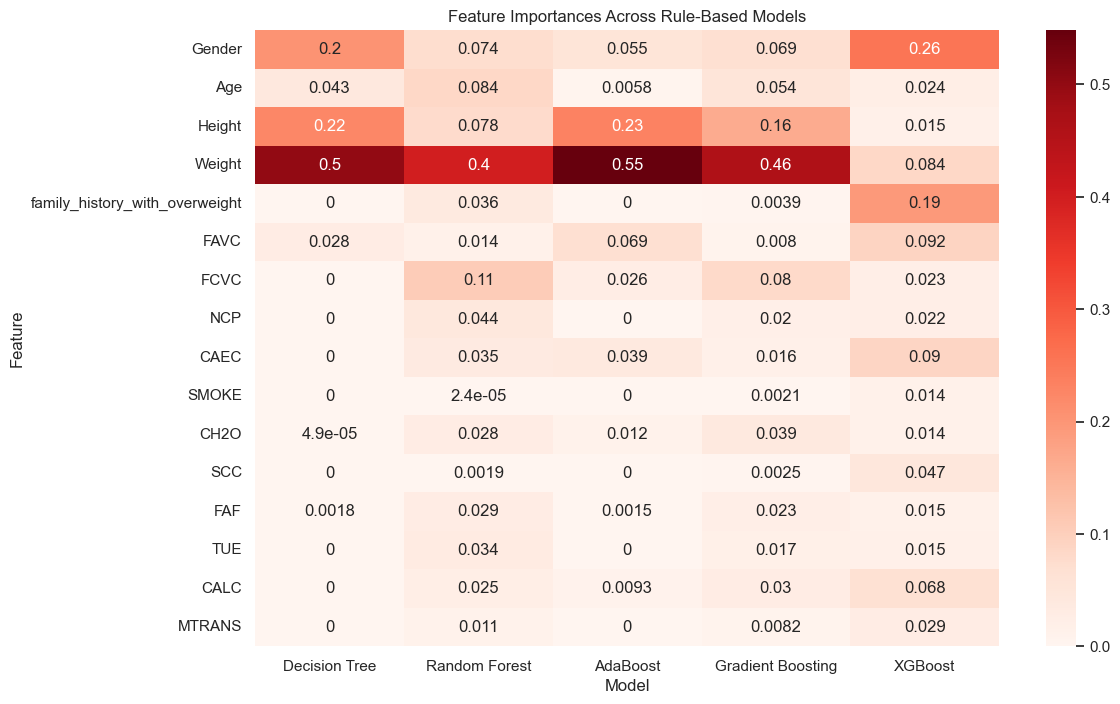

In [82]:
# **Heatmap of Feature Importances Across Models**

plt.figure(figsize=(12,8))
sns.heatmap(feature_importances_df_rules, annot=True, cmap='Reds')
plt.title('Feature Importances Across Rule-Based Models')
plt.xlabel('Model')
plt.ylabel('Feature')
plt.show()


In [83]:
# **Compute Average Feature Importance Across Models**

feature_importances_df_rules['Average'] = feature_importances_df_rules.mean(axis=1)

# Sort features by average importance
average_importance = feature_importances_df_rules['Average'].sort_values(ascending=False)

# Display the top features
print("Top Features Based on Average Importance:")
display(average_importance.head(5))


Top Features Based on Average Importance:


Feature
Weight                            0.398862
Height                            0.142837
Gender                            0.131529
FCVC                              0.046968
family_history_with_overweight    0.046731
Name: Average, dtype: float64

C:\Users\nikip\AppData\Local\Temp\ipykernel_5488\238484460.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_importance.values, y=average_importance.index, palette="viridis" )


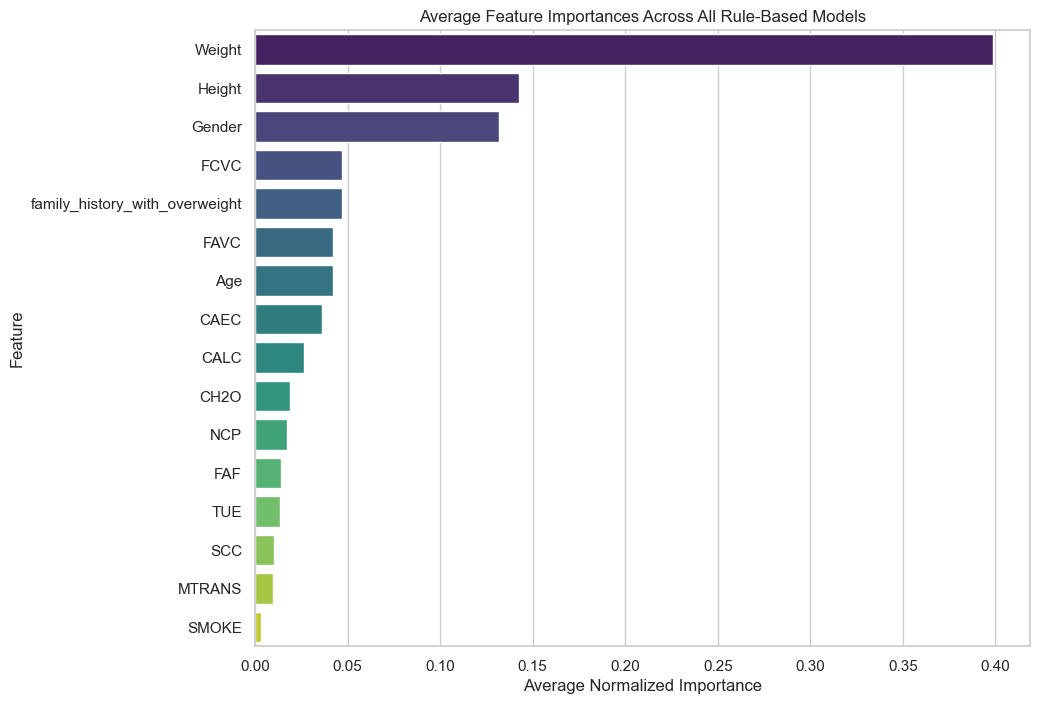

In [84]:
# **Compute Average Feature Importance Across Models**

feature_importances_df_rules['Average'] = feature_importances_df_rules.mean(axis=1)

# Sort features by average importance
average_importance = feature_importances_df_rules['Average'].sort_values(ascending=False)

# Plot the average feature importances
plt.figure(figsize=(10,8))
sns.barplot(x=average_importance.values, y=average_importance.index, palette="viridis" )
plt.title('Average Feature Importances Across All Rule-Based Models')
plt.xlabel('Average Normalized Importance')
plt.ylabel('Feature')
plt.show()


# Neural Networks & Deep Learning

## Data Preprocessing

In [85]:
# Define the file path
file_path = r"C:\Users\nikip\Desktop\try\ObesityDataSet_raw.csv"

# Load the dataset with semicolon separator
df_ANN = pd.read_csv(file_path)

# Display the first few rows to verify
df_ANN.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [86]:
target = 'NObeyesdad'
# Separate features and target
X = df_ANN.drop(columns=[target])
y = df_ANN[target]

# Encode the target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Split data into initial training and test sets (80% training, 20% test)
X_train_initial, X_test, y_train_initial, y_test = train_test_split(
    X, y_encoded, test_size=0.1, random_state=42, stratify=y_encoded
)

# Further split the initial training set into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_initial, y_train_initial, test_size=0.1, random_state=42, stratify=y_train_initial
)

# Verify the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (1709, 16)
X_val shape: (190, 16)
X_test shape: (212, 16)


In [87]:
# Assuming X_train is a pandas DataFrame
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [88]:
# Initialize the encoder
label_encoder = LabelEncoder()

# Encode each categorical column
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_val[col] = label_encoder.transform(X_val[col])
    X_test[col] = label_encoder.transform(X_test[col])


In [89]:
# **Encoding Target Variable**

# Convert labels to categorical one-hot encoding
num_classes = len(np.unique(y_train))
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_val_categorical = to_categorical(y_val, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)


In [90]:
y_train_categorical

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [91]:
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [92]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## ANN Architecture 1 - Simple

In [93]:
# **Building the Model**



# Initialize the model
model_config1 = Sequential()

# Input and first hidden layer
model_config1.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

# Input and second hidden layer
model_config1.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Output layer
model_config1.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model_config1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [94]:
# **Training Configuration 1**

history_config1 = model_config1.fit(
    X_train_scaled,
    y_train_categorical,
    validation_data=(X_val_scaled, y_val_categorical),
    epochs=50,
    batch_size=8,
    verbose=1
)


Epoch 1/50
214/214 [==============================] - 1s 1ms/step - loss: 1.1839 - accuracy: 0.6015 - val_loss: 0.7392 - val_accuracy: 0.7368
Epoch 2/50
214/214 [==============================] - 0s 843us/step - loss: 0.5969 - accuracy: 0.7929 - val_loss: 0.4897 - val_accuracy: 0.8368
Epoch 3/50
214/214 [==============================] - 0s 812us/step - loss: 0.3933 - accuracy: 0.8713 - val_loss: 0.3501 - val_accuracy: 0.8684
Epoch 4/50
214/214 [==============================] - 0s 794us/step - loss: 0.2829 - accuracy: 0.9152 - val_loss: 0.3135 - val_accuracy: 0.8789
Epoch 5/50
214/214 [==============================] - 0s 808us/step - loss: 0.2177 - accuracy: 0.9409 - val_loss: 0.2746 - val_accuracy: 0.9053
Epoch 6/50
214/214 [==============================] - 0s 789us/step - loss: 0.1649 - accuracy: 0.9561 - val_loss: 0.2495 - val_accuracy: 0.9105
Epoch 7/50
214/214 [==============================] - 0s 819us/step - loss: 0.1337 - accuracy: 0.9649 - val_loss: 0.2065 - val_accuracy: 0

7/7 [==============================] - 0s 833us/step


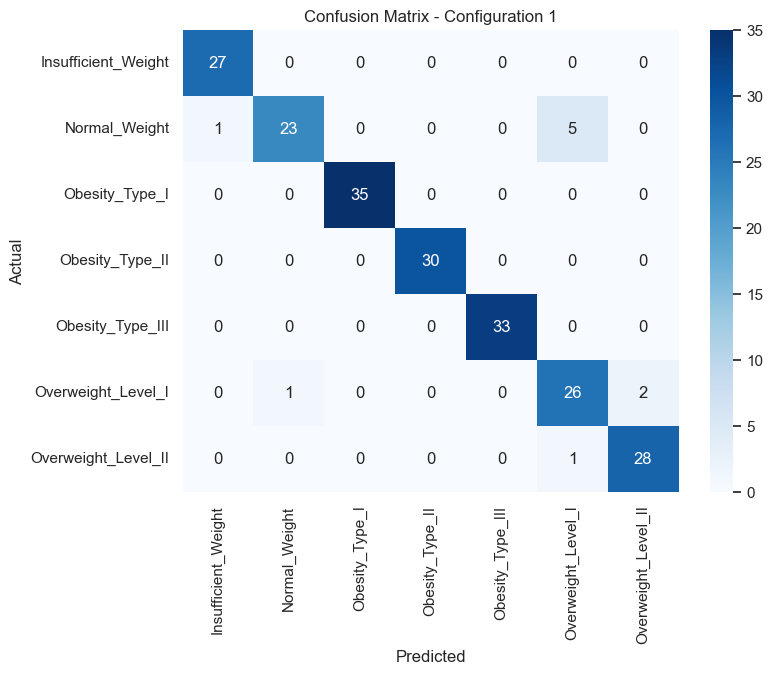

Configuration 1 Accuracy: 0.95
Configuration 1 F1 Score: 0.95
Configuration 1 Precision: 0.95
Configuration 1 Recall: 0.95


In [95]:
# **Predictions and Evaluation**

# Predict classes for test set
y_pred_config1 = np.argmax(model_config1.predict(X_test_scaled), axis=-1)

# Confusion Matrix
cm_config1 = confusion_matrix(y_test, y_pred_config1)
plt.figure(figsize=(8,6))
sns.heatmap(cm_config1, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Configuration 1')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Evaluation Metrics
accuracy_config1 = accuracy_score(y_test, y_pred_config1)
f1_config1 = f1_score(y_test, y_pred_config1, average='weighted')
precision_config1 = precision_score(y_test, y_pred_config1, average='weighted')
recall_config1 = recall_score(y_test, y_pred_config1, average='weighted')

print(f"Configuration 1 Accuracy: {accuracy_config1:.2f}")
print(f"Configuration 1 F1 Score: {f1_config1:.2f}")
print(f"Configuration 1 Precision: {precision_config1:.2f}")
print(f"Configuration 1 Recall: {recall_config1:.2f}")


## ANN Architecture 2 - Deep

In [96]:
# **Building the Model**

# Initialize the model
model_config2 = Sequential()

# Input and hidden layers
model_config2.add(Dense(units=512, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_config2.add(Dense(units=256, activation='relu'))
model_config2.add(Dropout(0.5))
model_config2.add(Dense(units=128, activation='relu'))
model_config2.add(Dense(units=64, activation='relu'))
model_config2.add(Dense(units=32, activation='relu'))
model_config2.add(Dense(units=16, activation='relu'))

# Output layer
model_config2.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model_config2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [97]:
# **Training Configuration 2**

history_config2 = model_config2.fit(
    X_train_scaled,
    y_train_categorical,
    validation_data=(X_val_scaled, y_val_categorical),
    epochs=70,
    batch_size=8,
    verbose=1
)


Epoch 1/70
214/214 [==============================] - 1s 2ms/step - loss: 1.0837 - accuracy: 0.5682 - val_loss: 0.5438 - val_accuracy: 0.7684
Epoch 2/70
214/214 [==============================] - 0s 1ms/step - loss: 0.5610 - accuracy: 0.7894 - val_loss: 0.3724 - val_accuracy: 0.8684
Epoch 3/70
214/214 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.8344 - val_loss: 0.2550 - val_accuracy: 0.9105
Epoch 4/70
214/214 [==============================] - 0s 1ms/step - loss: 0.3384 - accuracy: 0.8742 - val_loss: 0.2876 - val_accuracy: 0.8789
Epoch 5/70
214/214 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.8812 - val_loss: 0.2556 - val_accuracy: 0.9000
Epoch 6/70
214/214 [==============================] - 0s 1ms/step - loss: 0.2283 - accuracy: 0.9216 - val_loss: 0.2401 - val_accuracy: 0.9211
Epoch 7/70
214/214 [==============================] - 0s 1ms/step - loss: 0.2572 - accuracy: 0.9081 - val_loss: 0.1911 - val_accuracy: 0.9263
Epoch 

7/7 [==============================] - 0s 2ms/step


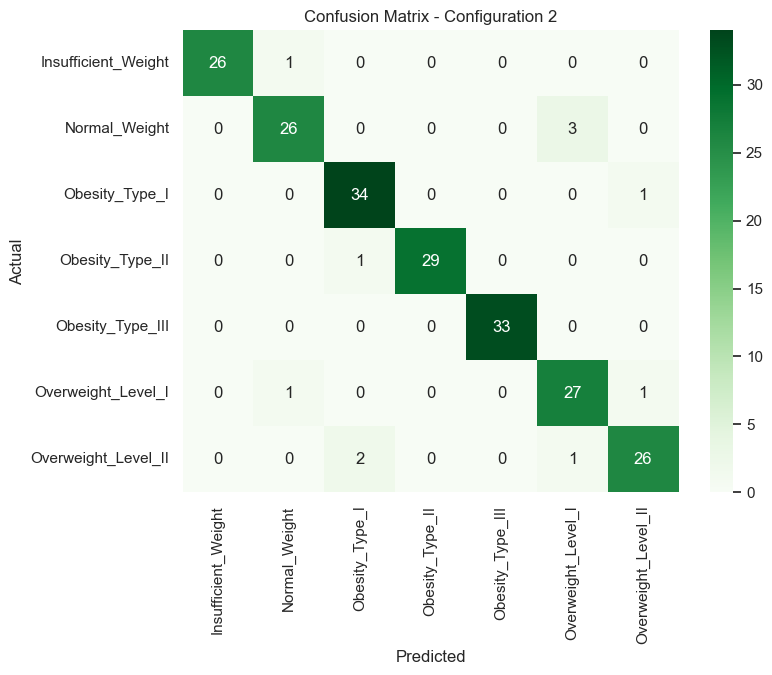

Configuration 2 Accuracy: 0.95
Configuration 2 F1 Score: 0.95
Configuration 2 Precision: 0.95
Configuration 2 Recall: 0.95


In [98]:
# **Predictions and Evaluation**

# Predict classes for test set
y_pred_config2 = np.argmax(model_config2.predict(X_test_scaled), axis=-1)

# Confusion Matrix
cm_config2 = confusion_matrix(y_test, y_pred_config2)
plt.figure(figsize=(8,6))
sns.heatmap(cm_config2, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Configuration 2')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Evaluation Metrics
accuracy_config2 = accuracy_score(y_test, y_pred_config2)
f1_config2 = f1_score(y_test, y_pred_config2, average='weighted')
precision_config2 = precision_score(y_test, y_pred_config2, average='weighted')
recall_config2 = recall_score(y_test, y_pred_config2, average='weighted')

print(f"Configuration 2 Accuracy: {accuracy_config2:.2f}")
print(f"Configuration 2 F1 Score: {f1_config2:.2f}")
print(f"Configuration 2 Precision: {precision_config2:.2f}")
print(f"Configuration 2 Recall: {recall_config2:.2f}")


## ANN Architecture 3 - Complex

In [99]:
# **Building the Model**

# Define regularization parameters
l1 = 1e-5
l2 = 1e-4

# Initialize the model
model_config3 = Sequential()

# Input and hidden layers
model_config3.add(Dense(units=512, input_shape=(X_train_scaled.shape[1],)))
model_config3.add(BatchNormalization())
model_config3.add(Activation('relu'))
model_config3.add(Dropout(0.5))

model_config3.add(Dense(units=1024, kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
model_config3.add(BatchNormalization())
model_config3.add(Activation('tanh'))

model_config3.add(Dense(units=512))
model_config3.add(BatchNormalization())
model_config3.add(Activation('relu'))
model_config3.add(Dropout(0.5))

model_config3.add(Dense(units=256))
model_config3.add(BatchNormalization())
model_config3.add(Activation('relu'))

model_config3.add(Dense(units=256))
model_config3.add(BatchNormalization())
model_config3.add(Activation('relu'))

model_config3.add(Dense(units=32))
model_config3.add(BatchNormalization())
model_config3.add(Activation('relu'))


# Output layer
model_config3.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model_config3.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [100]:
# Define Early Stopping callback

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',    # Metric to monitor
    factor=0.1,            # Reduce LR by a factor of 0.2
    patience=10,            # Wait for 5 epochs with no improvement
    min_lr=1e-4,           # Lower bound on the learning rate
    verbose=1              # Print messages when LR is reduced
)


early_stopping = EarlyStopping(
    monitor='val_loss',          # Can also be 'val_accuracy'
    patience=75,                 # Number of epochs to wait for improvement
    min_delta=1e-4,              # Minimum improvement threshold
    restore_best_weights=True,   # Restore the best weights after stopping
    verbose=1                    # Print messages when stopping
)

# Train the model with Early Stopping
history_config3 = model_config3.fit(
    X_train_scaled,
    y_train_categorical,
    validation_data=(X_val_scaled, y_val_categorical),
    epochs=500,
    batch_size=16,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/500
107/107 [==============================] - 3s 11ms/step - loss: 1.6574 - accuracy: 0.5418 - val_loss: 3.0685 - val_accuracy: 0.5105 - lr: 0.0100
Epoch 2/500
107/107 [==============================] - 1s 10ms/step - loss: 1.3558 - accuracy: 0.6489 - val_loss: 1.9055 - val_accuracy: 0.6474 - lr: 0.0100
Epoch 3/500
107/107 [==============================] - 1s 10ms/step - loss: 1.1633 - accuracy: 0.6893 - val_loss: 1.1623 - val_accuracy: 0.7263 - lr: 0.0100
Epoch 4/500
107/107 [==============================] - 1s 10ms/step - loss: 1.1190 - accuracy: 0.6706 - val_loss: 1.1374 - val_accuracy: 0.6474 - lr: 0.0100
Epoch 5/500
107/107 [==============================] - 1s 10ms/step - loss: 1.0698 - accuracy: 0.6700 - val_loss: 0.8688 - val_accuracy: 0.7632 - lr: 0.0100
Epoch 6/500
107/107 [==============================] - 1s 10ms/step - loss: 1.0471 - accuracy: 0.6916 - val_loss: 0.8746 - val_accuracy: 0.7263 - lr: 0.0100
Epoch 7/500
107/107 [==============================] - 1s 

7/7 [==============================] - 0s 3ms/step


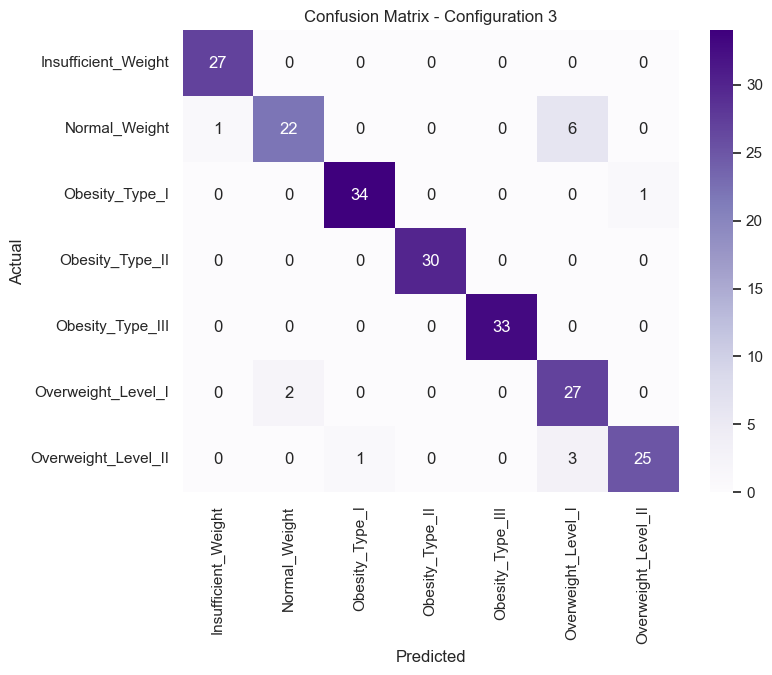

Configuration 3 Accuracy: 0.93
Configuration 3 F1 Score: 0.93
Configuration 3 Precision: 0.94
Configuration 3 Recall: 0.93


In [101]:
# **Predictions and Evaluation**

# Predict classes for test set
y_pred_config3 = np.argmax(model_config3.predict(X_test_scaled), axis=-1)

# Confusion Matrix
cm_config3 = confusion_matrix(y_test, y_pred_config3)
plt.figure(figsize=(8,6))
sns.heatmap(cm_config3, annot=True, fmt='d', cmap='Purples',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Configuration 3')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Evaluation Metrics
accuracy_config3 = accuracy_score(y_test, y_pred_config3)
f1_config3 = f1_score(y_test, y_pred_config3, average='weighted')
precision_config3 = precision_score(y_test, y_pred_config3, average='weighted')
recall_config3 = recall_score(y_test, y_pred_config3, average='weighted')

print(f"Configuration 3 Accuracy: {accuracy_config3:.2f}")
print(f"Configuration 3 F1 Score: {f1_config3:.2f}")
print(f"Configuration 3 Precision: {precision_config3:.2f}")
print(f"Configuration 3 Recall: {recall_config3:.2f}")


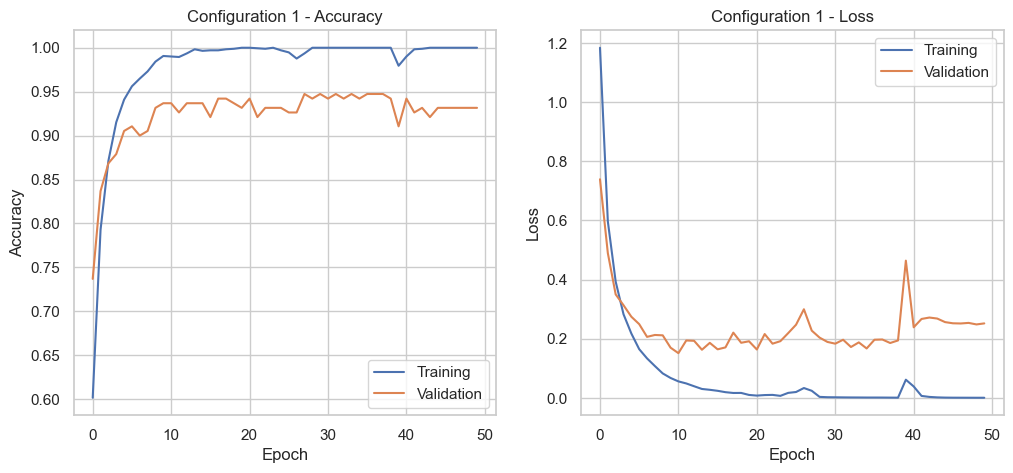

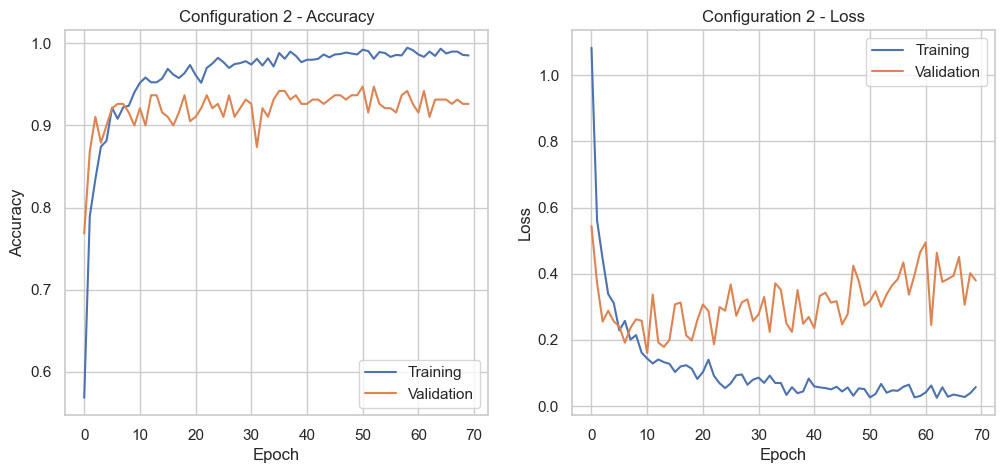

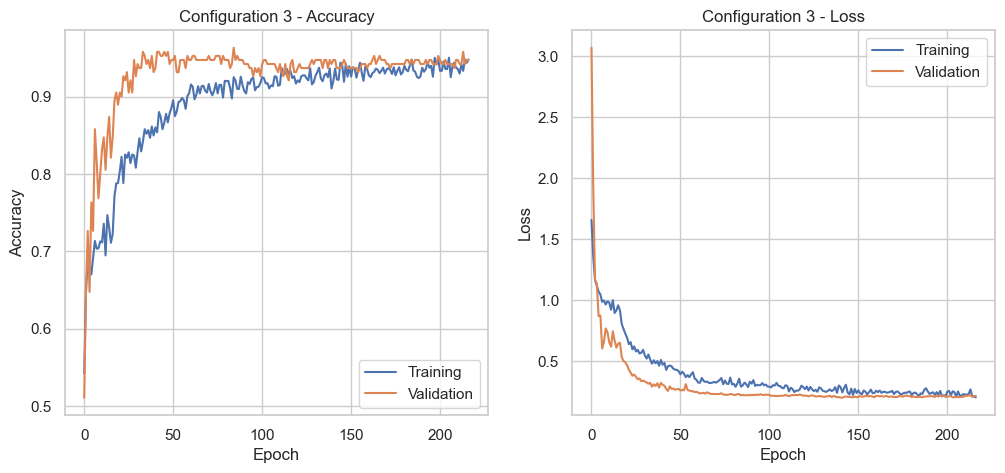

In [102]:
# **Plotting Training History**

def plot_training_history(history, config_number):
    # Plot accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'Configuration {config_number} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'Configuration {config_number} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Plot for each configuration
plot_training_history(history_config1, 1)
plot_training_history(history_config2, 2)
plot_training_history(history_config3, 3)


# Final Comparison

In [103]:
# **Creating a Dictionary of Model Performance Metrics**

# Initialize an empty list to store dictionaries of model performance
model_performance = []

model_performance.append({
    'Model': 'kNN (Base)',
    'Accuracy': knn_accuracy_base,
    'F1 Score': knn_f1_base,
    'Precision': knn_precision_base,
    'Recall': knn_recall_base
})

# Adjusted kNN Model
model_performance.append({
    'Model': 'kNN (Adjusted)',
    'Accuracy': knn_accuracy_adjusted,
    'F1 Score': knn_f1_adjusted,
    'Precision': knn_precision_adjusted,
    'Recall': knn_recall_adjusted
})

model_performance.append({
    'Model': 'Centroid-based Classifier (Base)',
    'Accuracy': accuracy_centroid_base,
    'F1 Score': f1_centroid_base,
    'Precision': precision_centroid_base,
    'Recall': recall_centroid_base
})

model_performance.append({
    'Model': 'Centroid-based Classifier (Adjusted)',
    'Accuracy': accuracy_centroid_adjusted,
    'F1 Score': f1_centroid_adjusted,
    'Precision': precision_centroid_adjusted,
    'Recall': recall_centroid_adjusted
})

model_performance.append({
    'Model': 'Gaussian NB (Base)',
    'Accuracy': accuracy_gnb_base,
    'F1 Score': f1_gnb_base,
    'Precision': precision_gnb_base,
    'Recall': recall_gnb_base
})

model_performance.append({
    'Model': 'Gaussian NB (Adjusted)',
    'Accuracy': accuracy_gnb_adjusted,
    'F1 Score': f1_gnb_adjusted,
    'Precision': precision_gnb_adjusted,
    'Recall': recall_gnb_adjusted
})

model_performance.append({
    'Model': 'Linear Discriminant Analysis (Base)',
    'Accuracy': accuracy_lda_base,
    'F1 Score': f1_lda_base,
    'Precision': precision_lda_base,
    'Recall': recall_lda_base
})

model_performance.append({
    'Model': 'Linear Discriminant Analysis (Adjusted)',
    'Accuracy': accuracy_lda_adjusted,
    'F1 Score': f1_lda_adjusted,
    'Precision': precision_lda_adjusted,
    'Recall': recall_lda_adjusted
})

model_performance.append({
    'Model': 'Logistic Regression (Base)',
    'Accuracy': accuracy_logreg_base,
    'F1 Score': f1_logreg_base,
    'Precision': precision_logreg_base,
    'Recall': recall_logreg_base
})

model_performance.append({
    'Model': 'Logistic Regression (Adjusted)',
    'Accuracy': accuracy_logreg_adjusted,
    'F1 Score': f1_logreg_adjusted,
    'Precision': precision_logreg_adjusted,
    'Recall': recall_logreg_adjusted
})

model_performance.append({
    'Model': 'Bagging with kNN (Base)',
    'Accuracy': accuracy_bagging_knn_base,
    'F1 Score': f1_bagging_knn_base,
    'Precision': precision_bagging_knn_base,
    'Recall': recall_bagging_knn_base
})

model_performance.append({
    'Model': 'Bagging with kNN (Adjusted)',
    'Accuracy': accuracy_bagging_knn_adjusted,
    'F1 Score': f1_bagging_knn_adjusted,
    'Precision': precision_bagging_knn_adjusted,
    'Recall': recall_bagging_knn_adjusted
})

model_performance.append({
    'Model': 'Decision Tree (Base)',
    'Accuracy': accuracy_dt_base,
    'F1 Score': f1_dt_base,
    'Precision': precision_dt_base,
    'Recall': recall_dt_base
})

model_performance.append({
    'Model': 'Decision Tree (Adjusted)',
    'Accuracy': accuracy_dt_adjusted,
    'F1 Score': f1_dt_adjusted,
    'Precision': precision_dt_adjusted,
    'Recall': recall_dt_adjusted
})

model_performance.append({
    'Model': 'Random Forest (Base)',
    'Accuracy': accuracy_rf_base,
    'F1 Score': f1_rf_base,
    'Precision': precision_rf_base,
    'Recall': recall_rf_base
})

model_performance.append({
    'Model': 'Random Forest (Adjusted)',
    'Accuracy': accuracy_rf_adjusted,
    'F1 Score': f1_rf_adjusted,
    'Precision': precision_rf_adjusted,
    'Recall': recall_rf_adjusted
})

model_performance.append({
    'Model': 'AdaBoost (Base)',
    'Accuracy': accuracy_adaboost_base,
    'F1 Score': f1_adaboost_base,
    'Precision': precision_adaboost_base,
    'Recall': recall_adaboost_base
})

model_performance.append({
    'Model': 'AdaBoost (Adjusted)',
    'Accuracy': accuracy_adaboost_adjusted,
    'F1 Score': f1_adaboost_adjusted,
    'Precision': precision_adaboost_adjusted,
    'Recall': recall_adaboost_adjusted
})

model_performance.append({
    'Model': 'Gradient Boosting (Base)',
    'Accuracy': accuracy_gb_base,
    'F1 Score': f1_gb_base,
    'Precision': precision_gb_base,
    'Recall': recall_gb_base
})

model_performance.append({
    'Model': 'Gradient Boosting (Adjusted)',
    'Accuracy': accuracy_gb_adjusted,
    'F1 Score': f1_gb_adjusted,
    'Precision': precision_gb_adjusted,
    'Recall': recall_gb_adjusted
})

model_performance.append({
    'Model': 'XGBoost (Base)',
    'Accuracy': accuracy_xgb_base,
    'F1 Score': f1_xgb_base,
    'Precision': precision_xgb_base,
    'Recall': recall_xgb_base
})

model_performance.append({
    'Model': 'XGBoost (Adjusted)',
    'Accuracy': accuracy_xgb_adjusted,
    'F1 Score': f1_xgb_adjusted,
    'Precision': precision_xgb_adjusted,
    'Recall': recall_xgb_adjusted
})

model_performance.append({
    'Model': 'Perceptron (Base)',
    'Accuracy': accuracy_perceptron_base,
    'F1 Score': f1_perceptron_base,
    'Precision': precision_perceptron_base,
    'Recall': recall_perceptron_base
})

model_performance.append({
    'Model': 'Perceptron (Adjusted)',
    'Accuracy': accuracy_perceptron_adjusted,
    'F1 Score': f1_perceptron_adjusted,
    'Precision': precision_perceptron_adjusted,
    'Recall': recall_perceptron_adjusted
})

model_performance.append({
    'Model': 'MLP (Base)',
    'Accuracy': accuracy_mlp_base,
    'F1 Score': f1_mlp_base,
    'Precision': precision_mlp_base,
    'Recall': recall_mlp_base
})

model_performance.append({
    'Model': 'MLP (Adjusted)',
    'Accuracy': accuracy_mlp_adjusted,
    'F1 Score': f1_mlp_adjusted,
    'Precision': precision_mlp_adjusted,
    'Recall': recall_mlp_adjusted
})

model_performance.append({
    'Model': 'SVM (Base)',
    'Accuracy': accuracy_svm_base,
    'F1 Score': f1_svm_base,
    'Precision': precision_svm_base,
    'Recall': recall_svm_base
})

model_performance.append({
    'Model': 'SVM (Adjusted)',
    'Accuracy': accuracy_svm_adjusted,
    'F1 Score': f1_svm_adjusted,
    'Precision': precision_svm_adjusted,
    'Recall': recall_svm_adjusted
}) 

model_performance.append({
    'Model': 'Neural Network (Config 1)',
    'Accuracy': accuracy_config1,
    'F1 Score': f1_config1,
    'Precision': precision_config1,
    'Recall': recall_config1
})

model_performance.append({
    'Model': 'Neural Network (Config 2)',
    'Accuracy': accuracy_config2,
    'F1 Score': f1_config2,
    'Precision': precision_config2,
    'Recall': recall_config2
})

model_performance.append({
    'Model': 'Neural Network (Config 3)',
    'Accuracy': accuracy_config3,
    'F1 Score': f1_config3,
    'Precision': precision_config3,
    'Recall': recall_config3
})


In [108]:
# **Creating the DataFrame**

performance_df = pd.DataFrame(model_performance)

# **Reordering Columns**
performance_df = performance_df[['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall']]

# **Rounding the Metrics for Better Display**
performance_df['Accuracy'] = performance_df['Accuracy'].round(4)
performance_df['F1 Score'] = performance_df['F1 Score'].round(4)
performance_df['Precision'] = performance_df['Precision'].round(4)
performance_df['Recall'] = performance_df['Recall'].round(4)

# **Sorting the DataFrame by Accuracy**
performance_df = performance_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)


In [109]:
performance_df

Model  Accuracy  F1 Score  Precision  \
0                            XGBoost (Base)    0.9551    0.9556     0.9576   
1                 Neural Network (Config 1)    0.9528    0.9525     0.9550   
2                  Gradient Boosting (Base)    0.9527    0.9533     0.9578   
3                      Random Forest (Base)    0.9504    0.9509     0.9529   
4                 Neural Network (Config 2)    0.9481    0.9483     0.9494   
5              Gradient Boosting (Adjusted)    0.9456    0.9463     0.9493   
6                 Neural Network (Config 3)    0.9340    0.9342     0.9399   
7                            MLP (Adjusted)    0.9173    0.9175     0.9199   
8                      Decision Tree (Base)    0.9149    0.9159     0.9183   
9                  Random Forest (Adjusted)    0.8983    0.8993     0.9022   
10              Bagging with kNN (Adjusted)    0.8794    0.8783     0.8809   
11      Linear Discriminant Analysis (Base)    0.8723    0.8747     0.8924   
12                               kNN (Base)    0.8629    0.8623     0.8697   
13                  Bagging with kNN (Base)    0.8582    0.8578     0.8644   
14                           kNN (Adjusted)    0.8440    0.8425     0.8464   
15  Linear Discriminant Analysis (Adjusted)    0.8251    0.8266     0.8553   
16                               MLP (Base)    0.8227    0.8248     0.8343   
17                 Decision Tree (Adjusted)    0.8156    0.8124     0.8166   
18                               SVM (Base)    0.7896    0.7932     0.8046   
19                       XGBoost (Adjusted)    0.7707    0.7725     0.7845   
20                      AdaBoost (Adjusted)    0.7281    0.6884     0.7969   
21           Logistic Regression (Adjusted)    0.7021    0.6952     0.7313   
22                           SVM (Adjusted)    0.6336    0.6218     0.6488   
23               Logistic Regression (Base)    0.6288    0.6195     0.6561   
24                    Perceptron (Adjusted)    0.6123    0.5933     0.6331   
25         Centroid-based Classifier (Base)    0.5319    0.5275     0.5317   
26                        Perceptron (Base)    0.5248    0.5135     0.6465   
27                   Gaussian NB (Adjusted)    0.4965    0.4560     0.4784   
28                       Gaussian NB (Base)    0.4563    0.4171     0.4625   
29     Centroid-based Classifier (Adjusted)    0.3475    0.3371     0.3395   
30                          AdaBoost (Base)    0.3381    0.2423     0.3735   

    Recall  
0   0.9551  
1   0.9528  
2   0.9527  
3   0.9504  
4   0.9481  
5   0.9456  
6   0.9340  
7   0.9173  
8   0.9149  
9   0.8983  
10  0.8794  
11  0.8723  
12  0.8629  
13  0.8582  
14  0.8440  
15  0.8251  
16  0.8227  
17  0.8156  
18  0.7896  
19  0.7707  
20  0.7281  
21  0.7021  
22  0.6336  
23  0.6288  
24  0.6123  
25  0.5319  
26  0.5248  
27  0.4965  
28  0.4563  
29  0.3475  
30  0.3381

In [105]:
# **Saving the DataFrame to CSV**

performance_df.to_csv('model_performance_comparison.csv', index=False)

print("\nModel performance comparison saved to 'model_performance_comparison.csv'")



Model performance comparison saved to 'model_performance_comparison.csv'


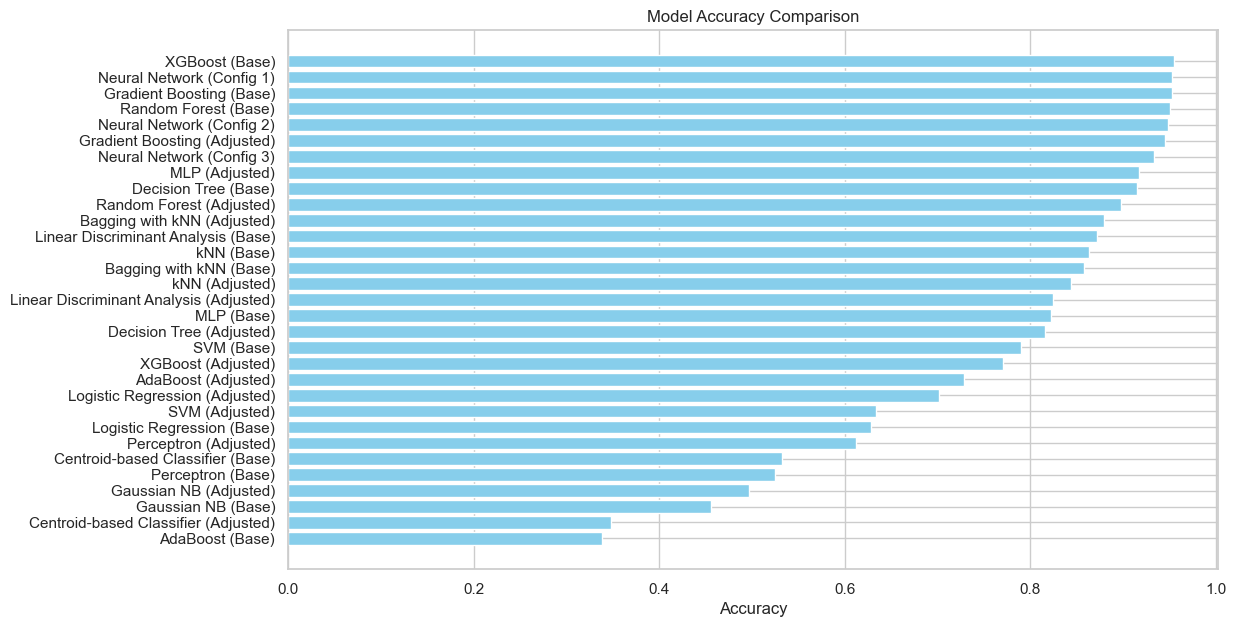

In [112]:
plt.figure(figsize=(12,7))
plt.barh(performance_df['Model'], performance_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy on top
plt.show()